<a href="https://colab.research.google.com/github/Murithi1/5-Days-Live-EDA-and-Feature-Engineering/blob/main/SyriaTel_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *SYRIA_TEL CUSTOMER CHURN*






***Problem Statement***

The telecommunication sector is made up of companies that make communication possible on a global scale, whether through the phone, the internet, over airwaves, or cables. These companies create the infrastructure that allows data as text, voice, audio, or video to be sent anywhere in the world.

In this case we shall be using dataset from a Telecom company known as SyriaTel. We will manipulate the dataset to get a analysis of the churning rate that the company is experiencing.

The business problem in this scenario is firstly SyriaTel wants to reduce the money they are losing when customers decide to exit and go for another Telecom company. We are going to identify the factors that contribute to customer churn in the telecom industry. 

We will develop a machine learning model that can predict the likelihood of customer churn based on various customer characteristics and usage patterns. 

Our goal is to use this model to identify customers who are at high risk of churning and take proactive measures to retain them. By reducing customer churn, the company can improve customer satisfaction, increase revenue, and gain a competitive advantage in the market.


***Objective(s) of this Project:***


Based on the given dataset, the following objectives will be defined:

*Main Objective* 

Develop a machine learning model to predict the churn score based on usage pattern.

*Specific Objectives*

1. Identify the factors that contribute to customer churn.

2. Evaluate the effectiveness of retention strategies.

3. Give appropriate recommendations to assist in minimizing the churn rate.

The company - who is our stakeholder may be interested in asking the following questions that we aim to answer with our model:

1. What are the most common reasons for customer churn?
2. How likely are the customers likely to churn, based on their usage patterns and customer characteristics?
3. How can the company prevent its customers from churning?
4. What retention strategies have been most effective in reducing customer churn?

***Stakeholder:***

The Telecom company that provided the dataset is the primary stakeholder. They are interested in identifying the reasons behind customer churn and developing strategies to reduce churn and increase customer retention as well as increase their revenue.

***Perfomance Metrics:***

The most appropriate performance metric for this project is 'recall' or 'sensitivity'. This is because reducing false negatives (i.e. customers who actually churn but are predicted as not churning) is a high priority for the telecom company. By correctly identifying customers who are likely to churn, the company can take proactive measures to retain them and reduce the overall churn rate.

However, it is also important to balance this with other performance metrics such as 'precision' and 'accuracy' to ensure that the model is not overly aggressive in predicting churn and causing false alarms or negatively impacting customer experience. Therefore, a combination of metrics such as accuracy,precision, recall, F1-score and ROC- AUC can be used to evaluate the performance of the model and ensure that it meets the business requirements and goals of the telecom company.

***Target Variable***

Churn: if the customer has churned = true else = False.

## *Data Understanding*

***The Dataset used :***

Dataset Link: [link text](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset)

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns 

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import itertools

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix


### *Loading Dataset*

In [195]:
#loading the dataset
data = pd.read_csv('/content/contentSyriaTel_Customer_Churn.csv.csv', index_col = 0)
# A copy of our original dataset to work with
df = data.copy()

In [196]:
#Display the first five rows of the dataset
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [197]:
#A summary of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

#### Numerical Features()
   * account length
   * area code
   * number vmail messages
   * total day minutes
   * total day calls
   * total day charge
   * total eve minutes
   * total eve calls 
   * total eve charge
   * total night minutes
   * total night calls
   * total night charge
   * total intl minutes
   * total intl calls
   * total intl charge
   * customer service calls

#### Categorical Features()
   * phone number
   * international plan
   * voice mail plan


In [198]:
#Getting the statistical analysis of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [199]:
df.columns

Index(['account length', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

***Exploratory Data Analysis***

Here we will use 3 different analysis approaches to perform the dataset analyses.

These are: 
- Univariate analysis
- Bivariate analysis
- Multivariate analysis 


### *Univariate Analysis*

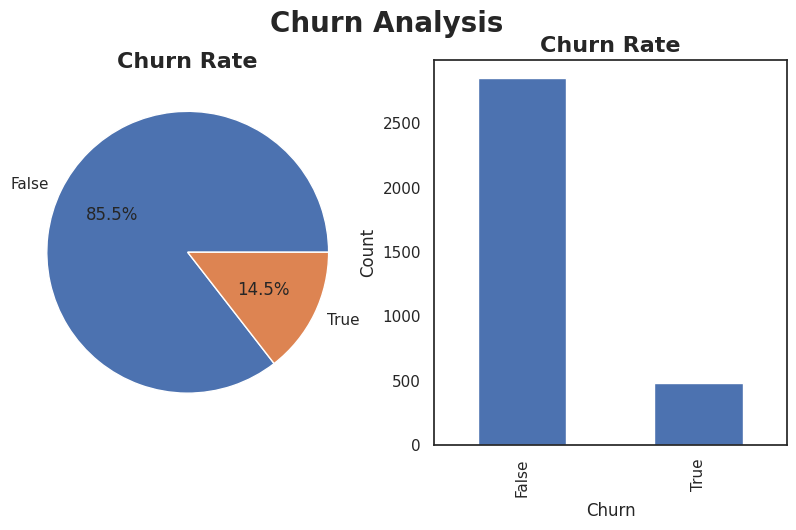

In [200]:
#Plotting a pie chart to display the false and true parameters
#Plotting a bar graph to display the counts of each 
fig, ax = plt.subplots(1, 2, figsize=(10,5))

df['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Churn Rate', fontsize=16, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

df['churn'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Churn Rate', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('Churn Analysis', fontsize=20, fontweight='bold')
plt.show()


From the visualizations displayed above, we can see that the churn rate of The SyriaTel customers is at 14.5% .

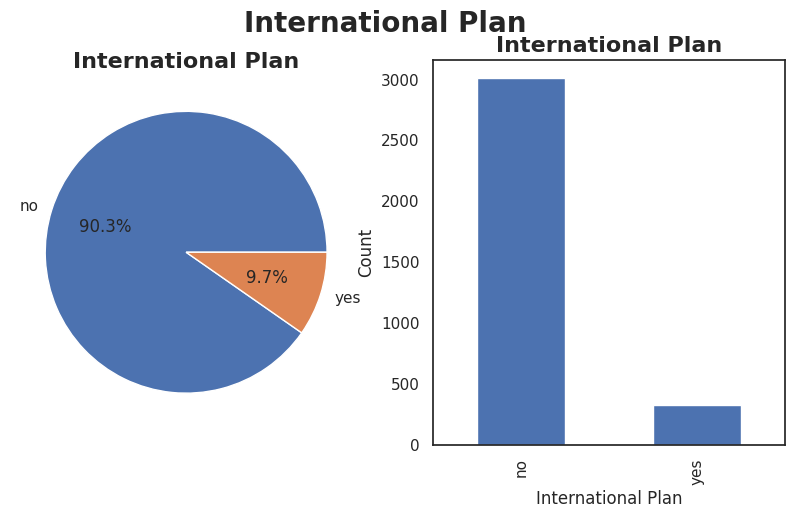

In [201]:
# Displaying the customers who are on the International Plan 
fig, ax = plt.subplots(1, 2, figsize=(10,5))

df['international plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('International Plan', fontsize=16, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

df['international plan'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('International Plan', fontsize=16, fontweight='bold')
ax[1].set_xlabel('International Plan', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('International Plan', fontsize=20, fontweight='bold')
plt.show()


From the visual above we can reach a suitable conclusion that most customers on the SyriaTel telecom are not on the international plan with a high percentage of 90.5%.

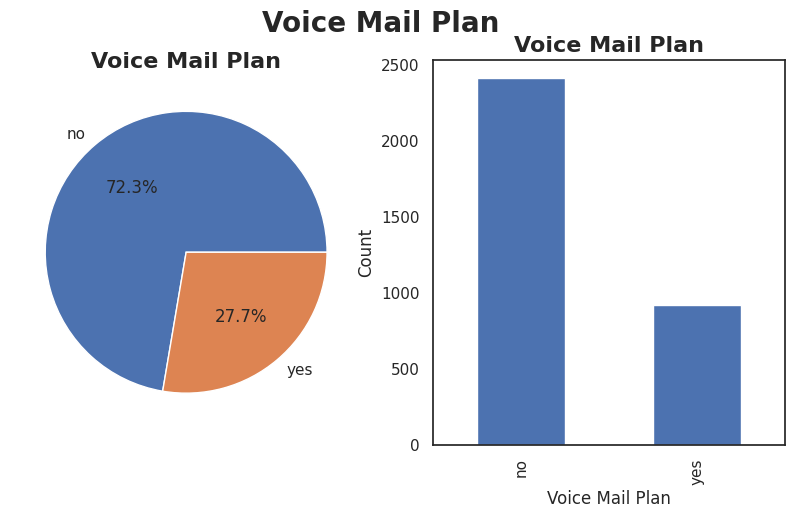

In [202]:
# Displaying the churn rate in accordance to the voice mail plan
fig, ax = plt.subplots(1, 2, figsize=(10,5))

df['voice mail plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Voice Mail Plan', fontsize=16, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

df['voice mail plan'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Voice Mail Plan', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Voice Mail Plan', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('Voice Mail Plan ', fontsize=20, fontweight='bold')
plt.show()


It's evident that 27.8 % of our customers were using the  `'voice mail plan'`

### *Bivariate Analysis*

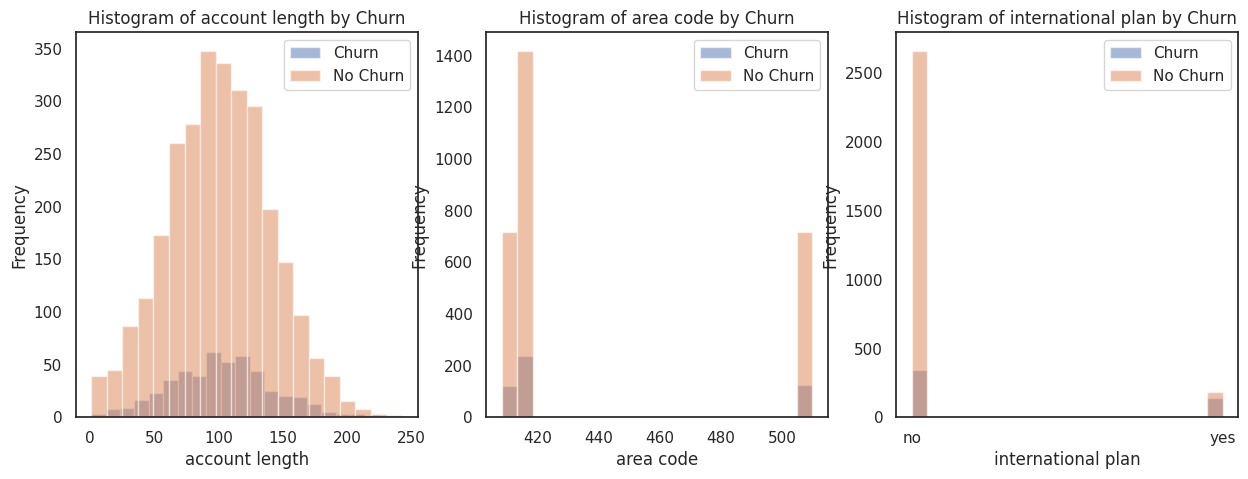

In [203]:
# Plotting churn rate against 'account length', 'area code', 'international plan'
cols = ['account length', 'area code', 'international plan']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

From the above visuals we were able to conclude that:
1. Most customers left the company with an account length of approximately 90 to 120 days of being members.
2. Most customers are in the 415 area code. The highest churn rate appeared to be on the 415 area code.
3. The customers who do not have an international plan are more likely to churn as compared to those that have an international plan. 


In [204]:
#confirming the number of unique area codes in the dataset
df['area code'].nunique()

3

In [205]:
df['area code'].unique()

array([415, 408, 510])

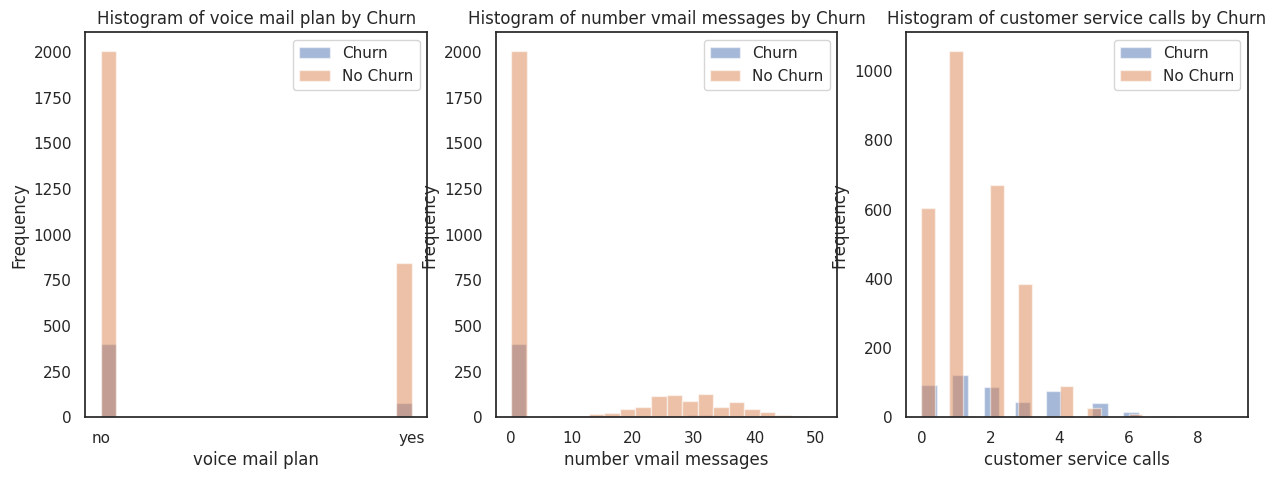

In [206]:
#Plotting the churn rate against 'voice mail plan','number of vmail messages' and 'customer services calls' from the dataset
cols = ['voice mail plan', 'number vmail messages', 'customer service calls']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

The above analysis explains that:

1. The customers who had no voicemail plan ended up having a higher churn rate as compared to those who had subscribed to having a voicemail plan.
2. The chances of the customers churning are higher when you have less vmail messages as compared to having more vmail messages.
3. The less number of customer service calls made to the telecom company the higher the churn rate of customers.

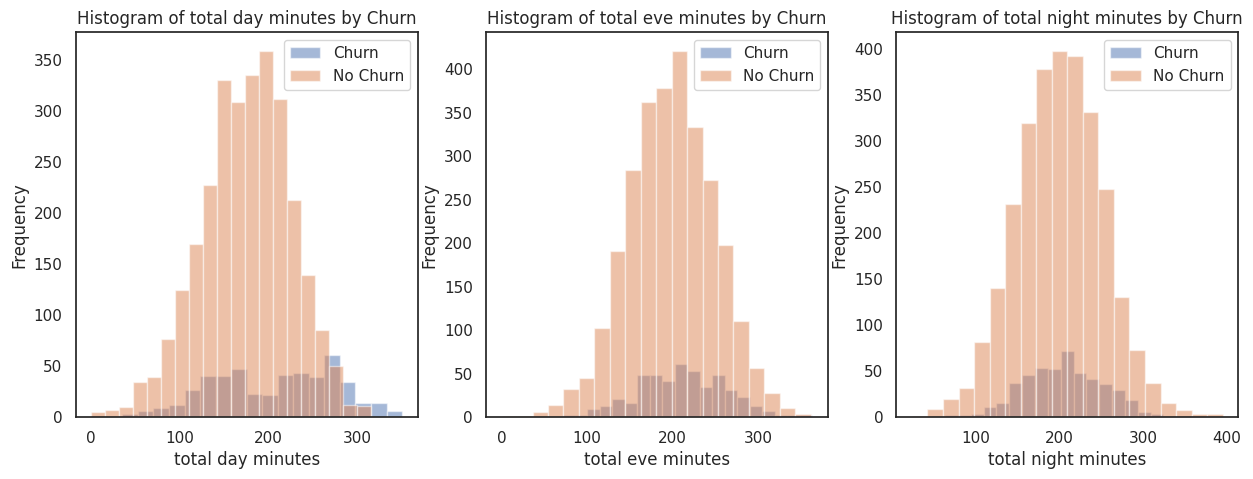

In [207]:
#Plotting churn rate against 'total day minutes', 'total evening minutes' and 'total night minutes'
cols = ['total day minutes', 'total eve minutes', 'total night minutes']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

According to the visualizations potrayed above. We were able to deduce that:

1. The churn rate across the board was very minimal against the said variables as the minutes increased during the day towards the evening and in the nighttime.

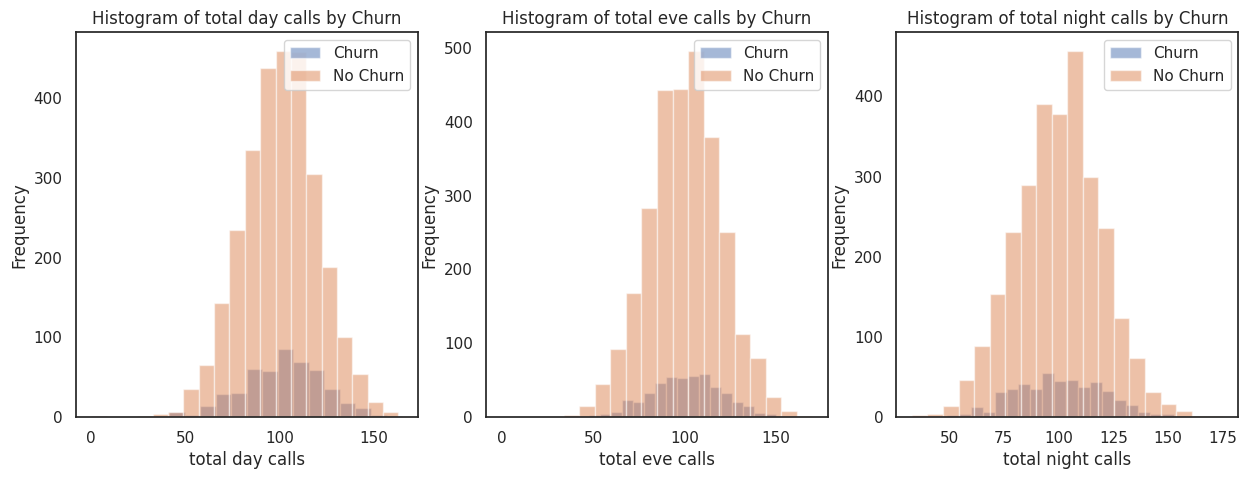

In [208]:
#Plotting the churn rate against 'total day calls', 'total evening calls' and 'total night calls'
cols = ['total day calls', 'total eve calls', 'total night calls']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

According to the visual above the churn rate is at an ultimately low as as the number of calls increase throughout the day, evening and night. There is a high 'no churn' rate.

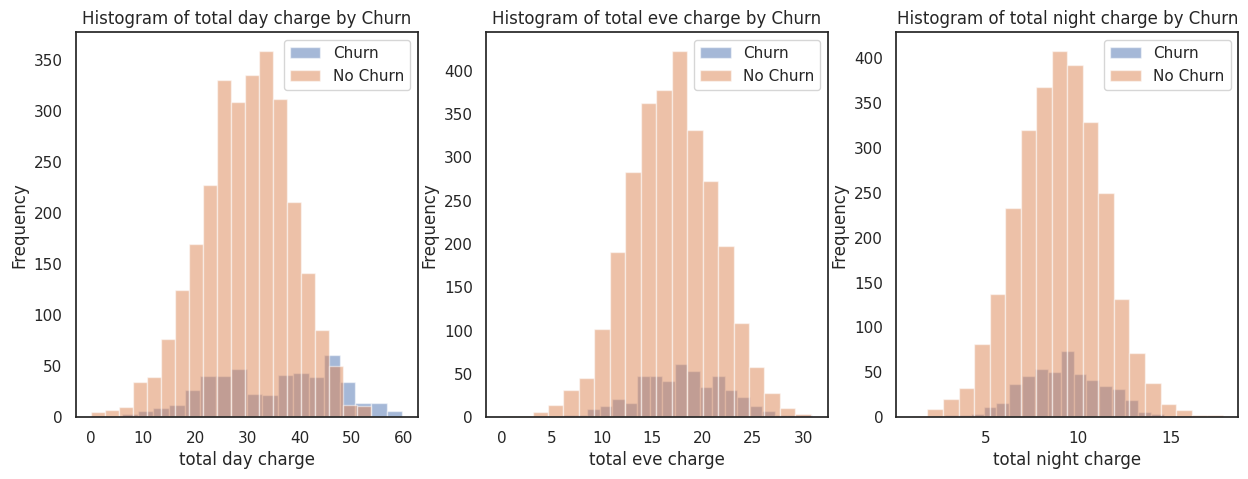

In [209]:
# Plotting the churn rate against 'total day charge','total evening charge' and 'total night charge'
cols = ['total day charge', 'total eve charge', 'total night charge']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

Our visualizations signify a low churn rate as the charges increase throughout parts of the day.


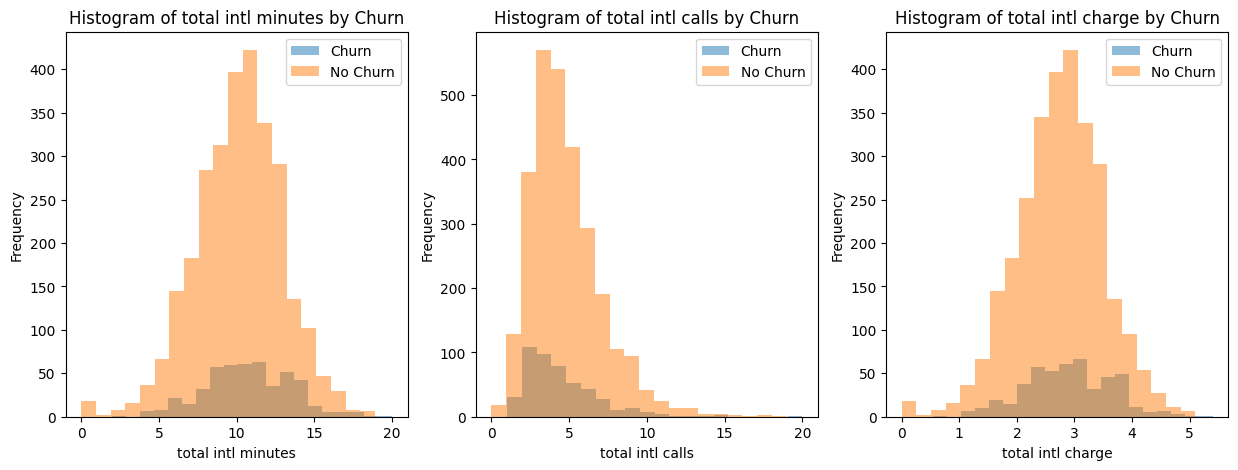

In [ ]:
# Plotting the churn rate against 'total intl minutes','total intl calls' and 'total intl charge'
cols = ['total intl minutes', 'total intl calls', 'total intl charge']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(df[df['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(df[df['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

### *Multivariate Analysis*

<ipython-input-18-2a3843f0ea05>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

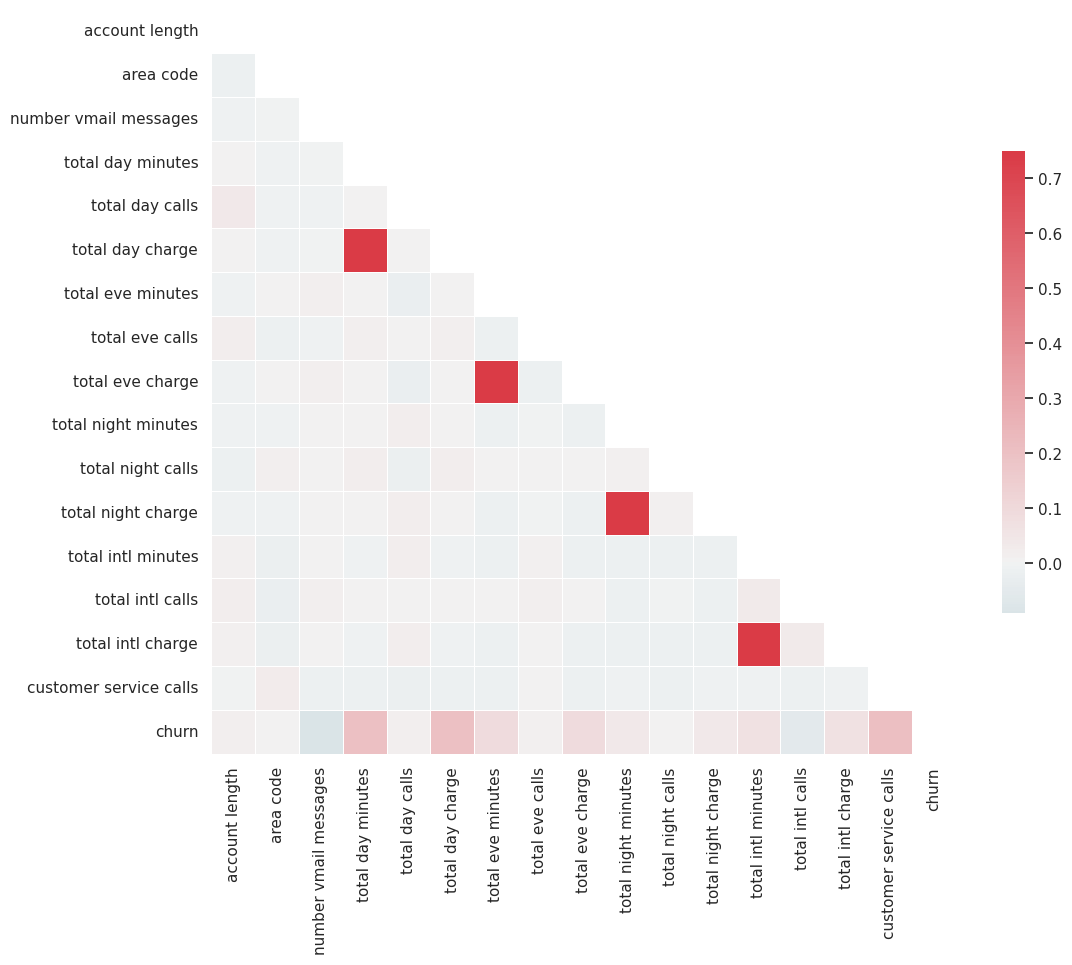

In [ ]:
#Creating a heatmap that show the correlation between the different variables in the dataset.
sns.set(style = 'white')

corr = df.corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize= (12,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .75, center = 0, square = True, linewidth = .5, cbar_kws = {'shrink':.5})

In [ ]:
df.corr()['churn'].map(abs).sort_values(ascending=False)

<ipython-input-19-823c1ecc3eef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['churn'].map(abs).sort_values(ascending=False)


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64

### *Distribution analysis*

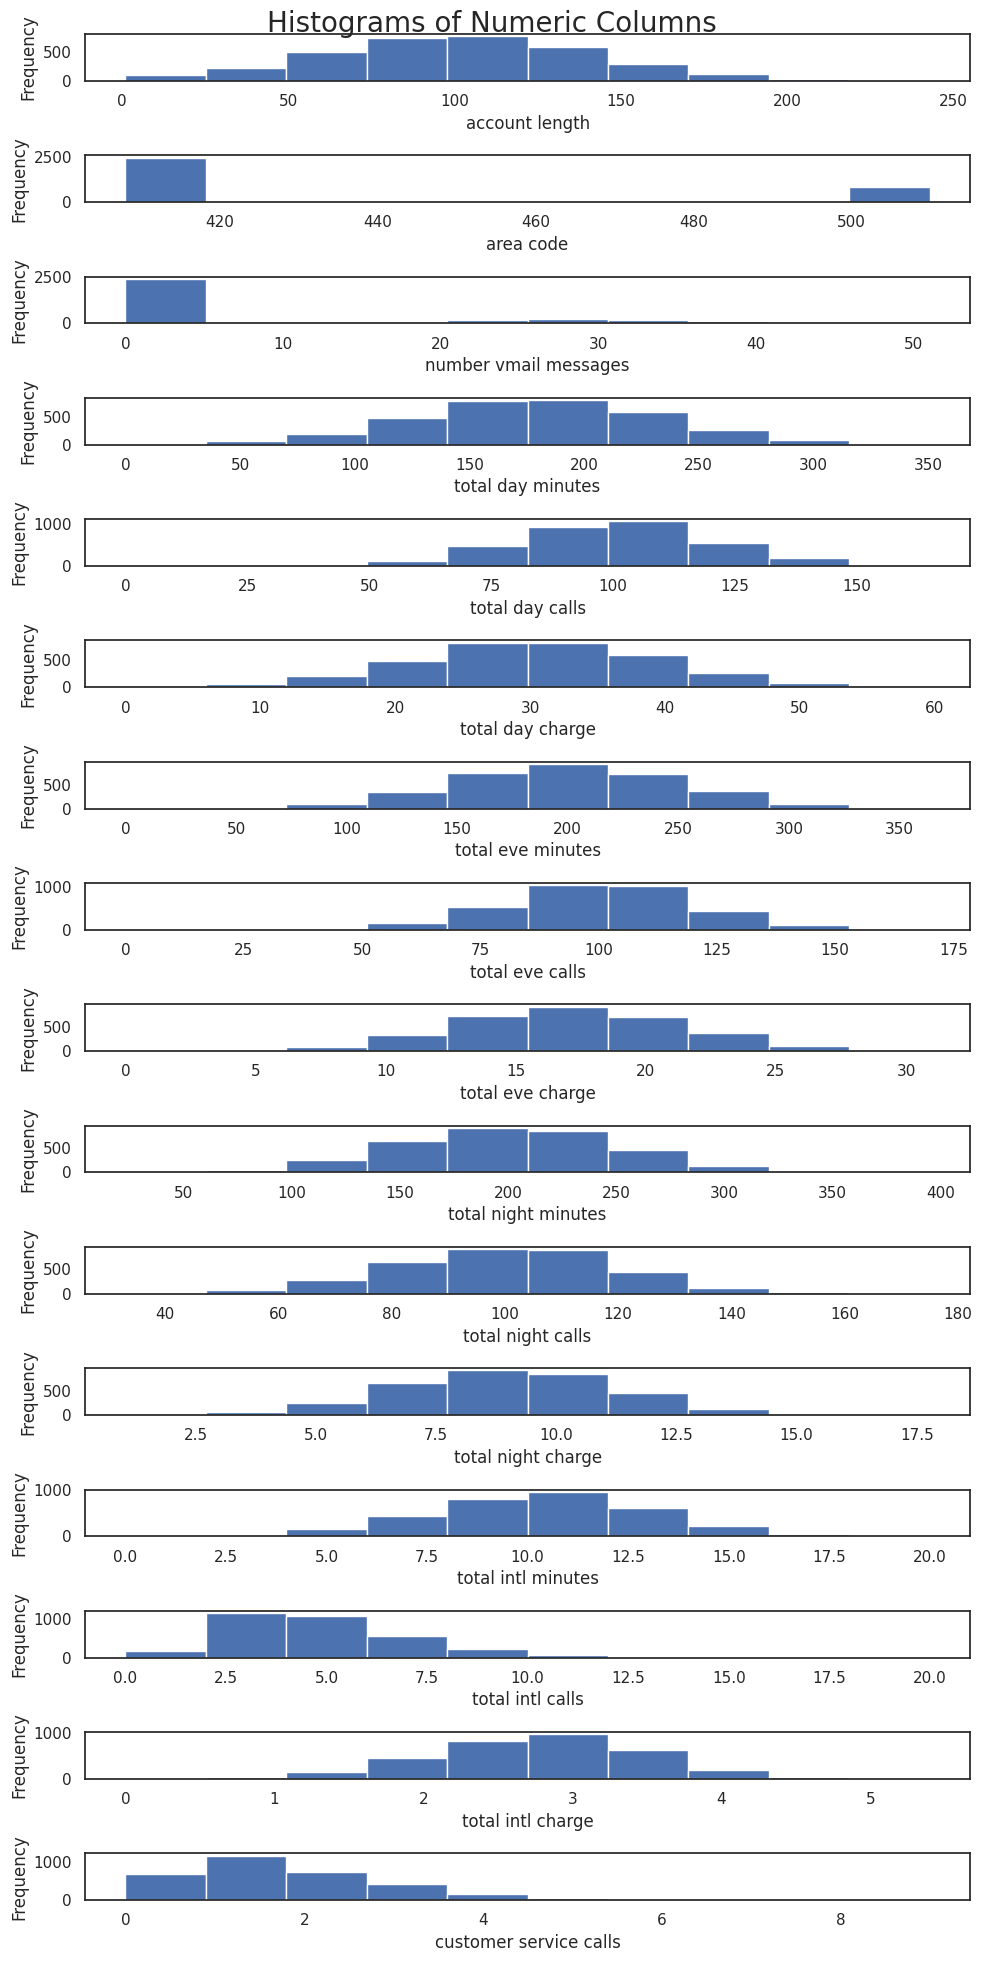

In [ ]:
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Plotting histograms to get an overview distribution of the columns
fig, axes = plt.subplots(nrows=numeric_cols.shape[1], ncols=1, figsize=(10, 20))
fig.suptitle('Histograms of Numeric Columns', fontsize=20)

for i, column in enumerate(numeric_cols.columns):
    axes[i].hist(numeric_cols[column])
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

From the graph grid most columns appear not to have a normal distibution.This will later be corrected through normalization.

### *Outliers*

In [ ]:
cols = ['account length','area code','number vmail messages','total day minutes','total day calls','total day charge',
'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

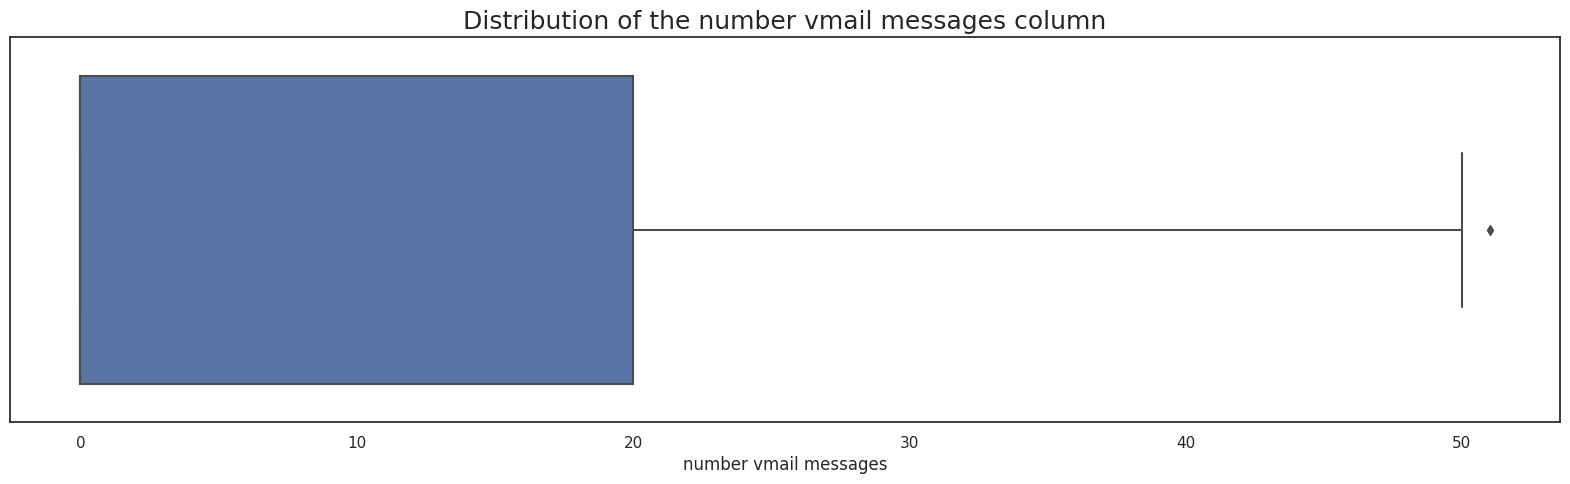

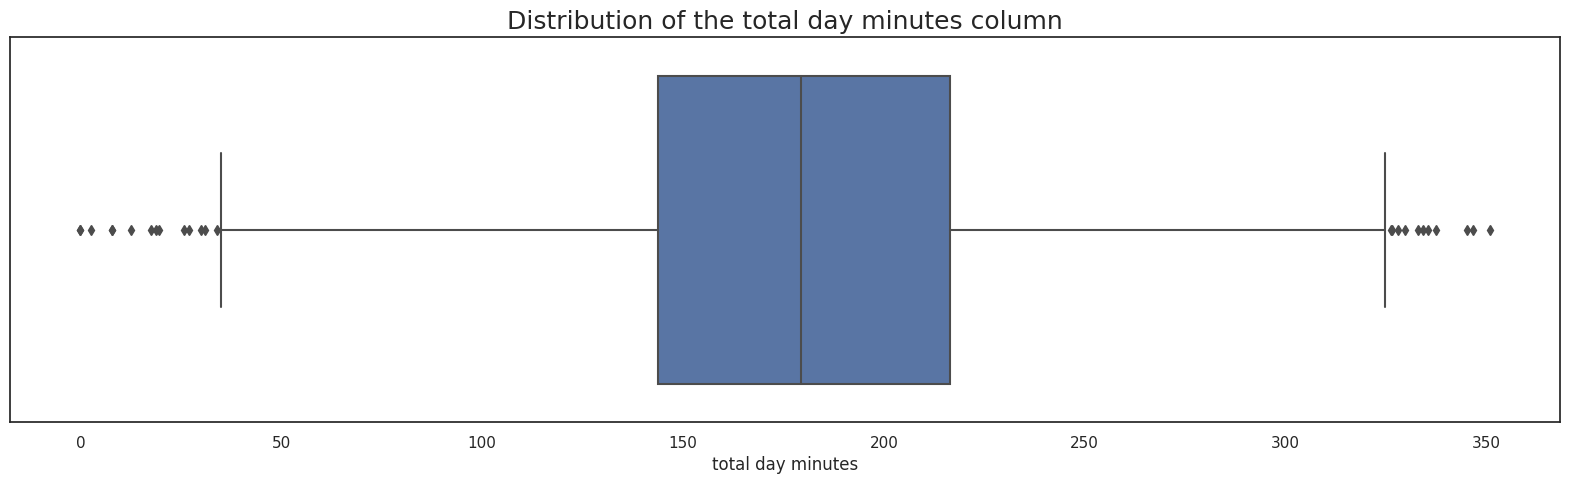

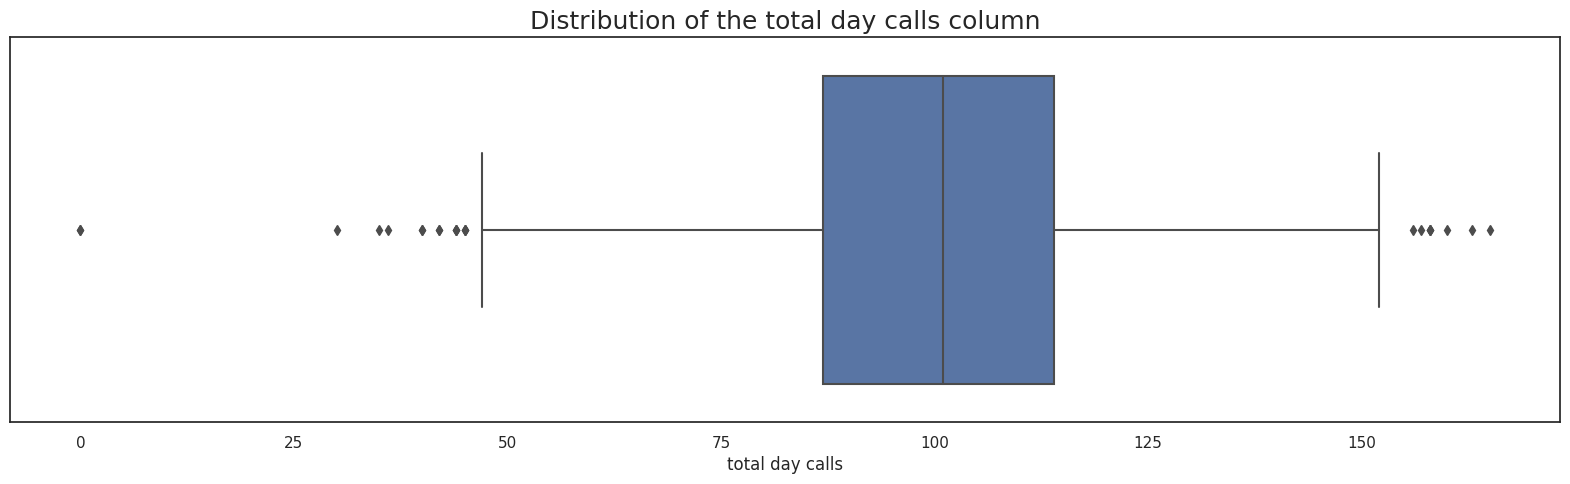

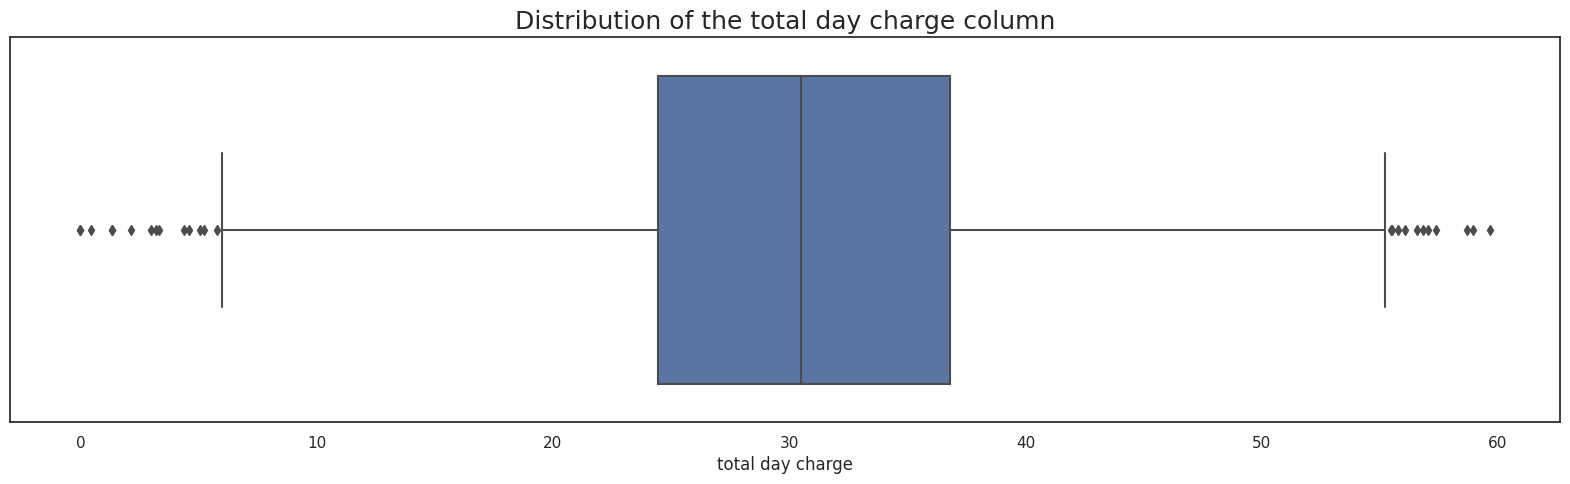

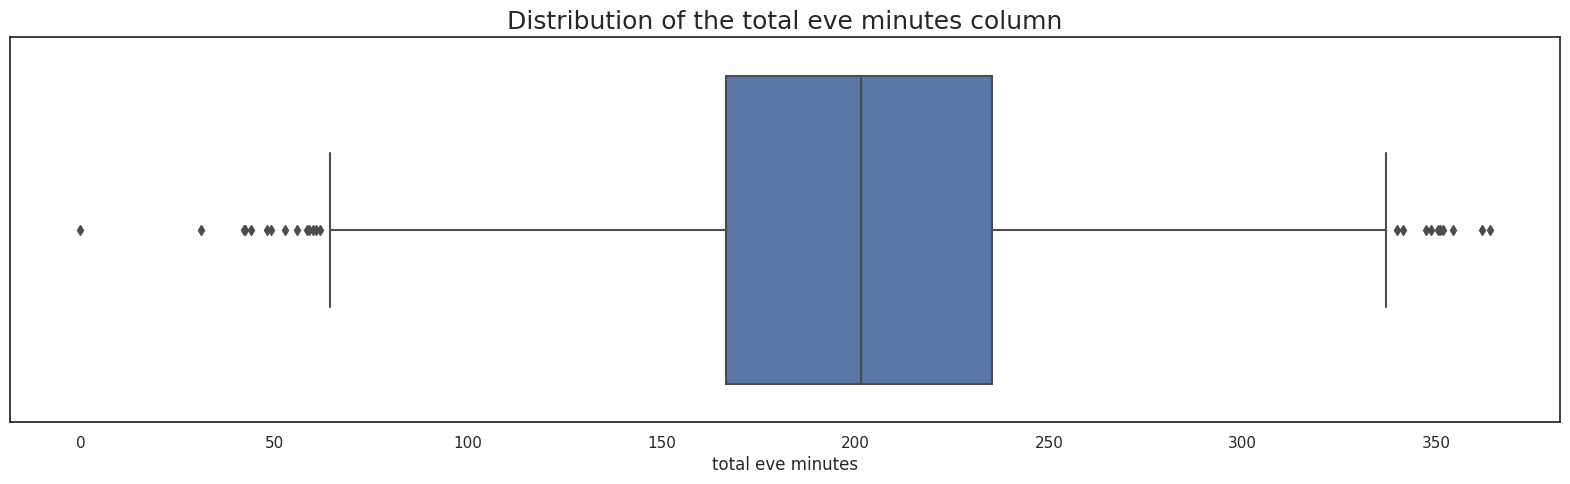

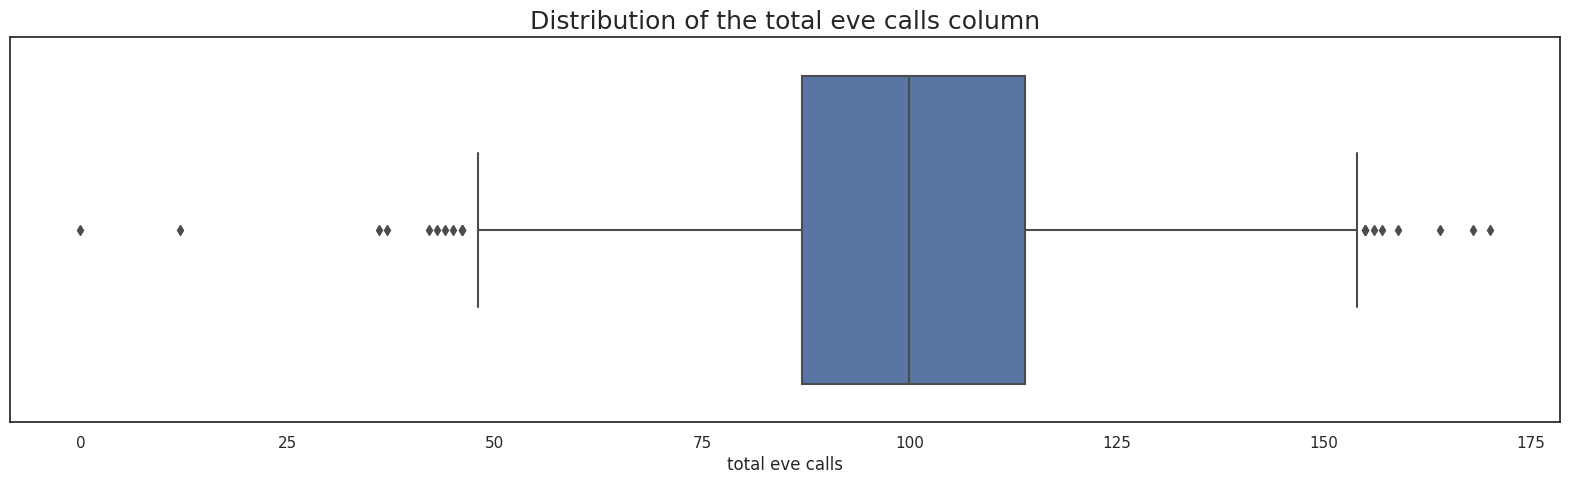

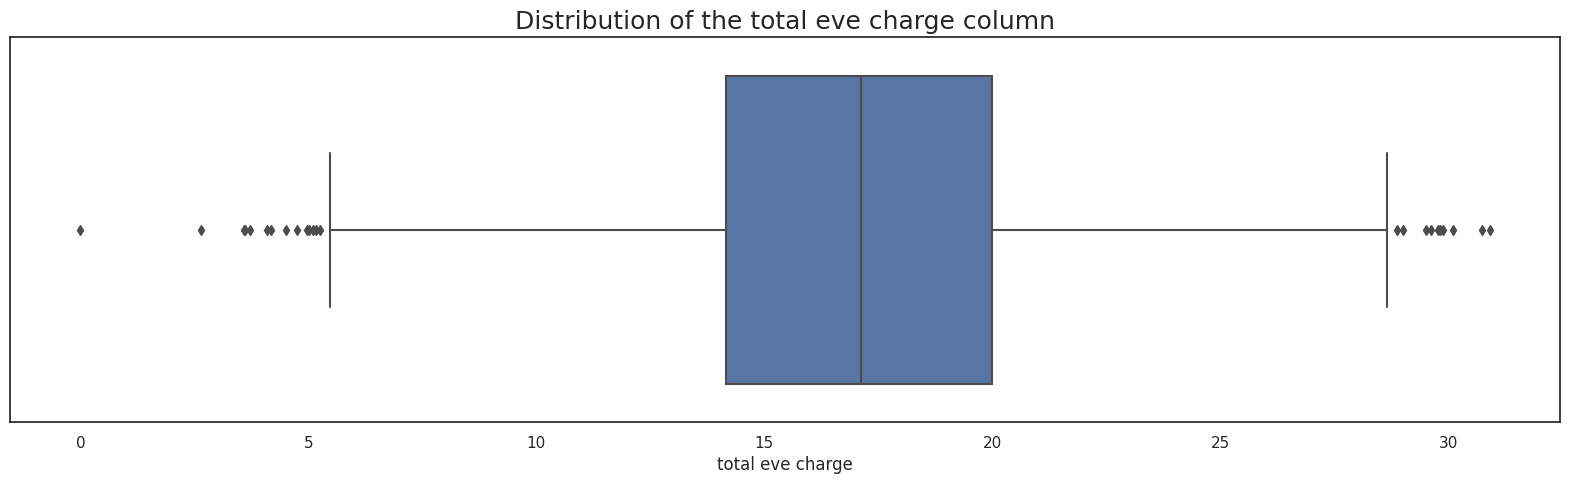

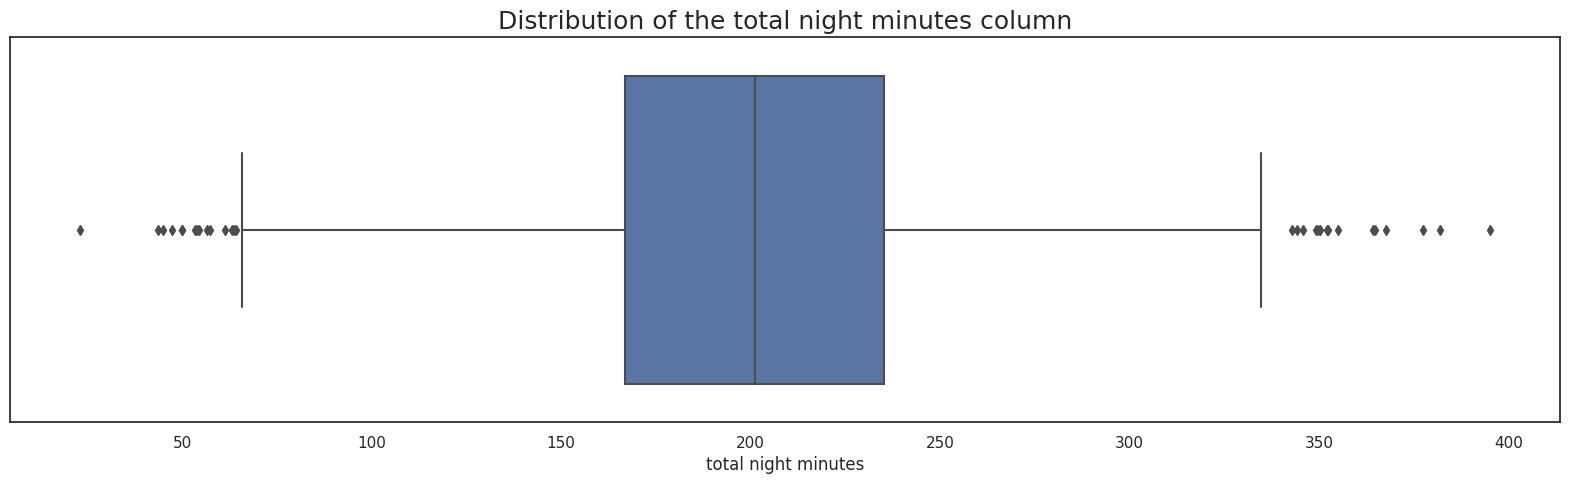

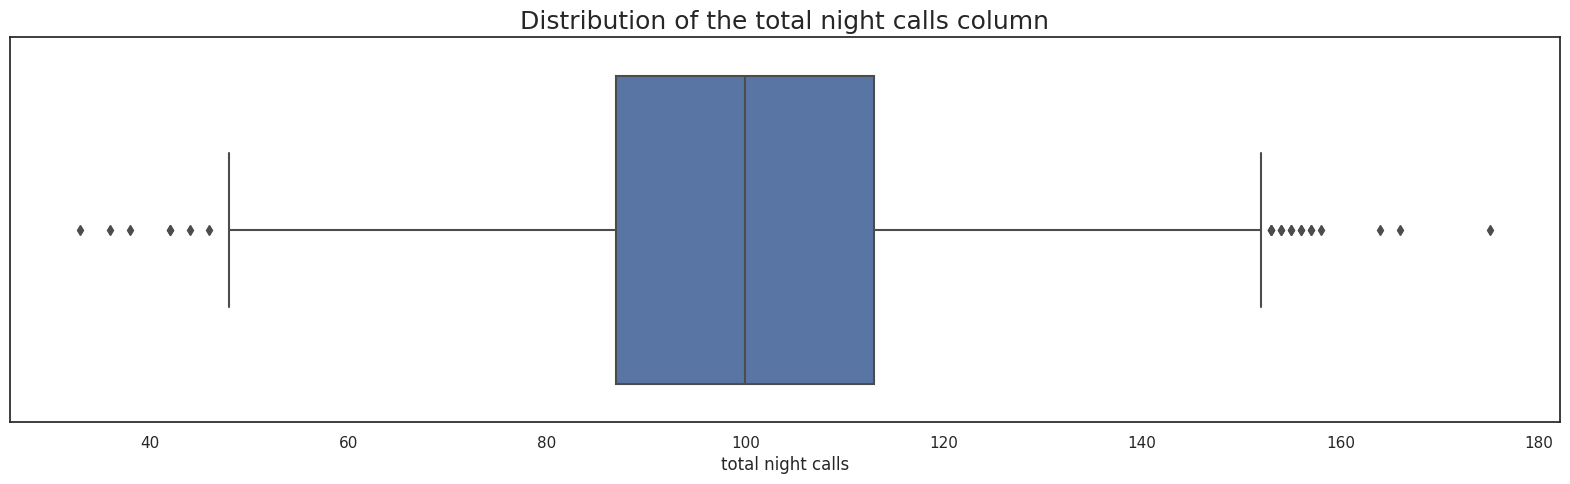

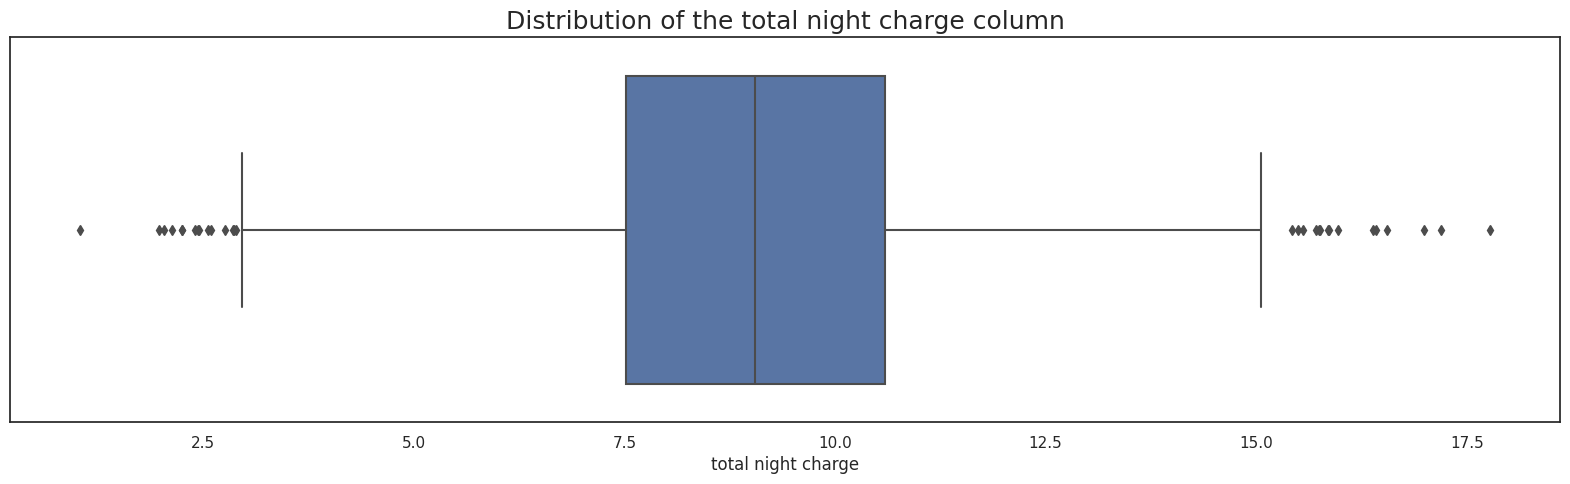

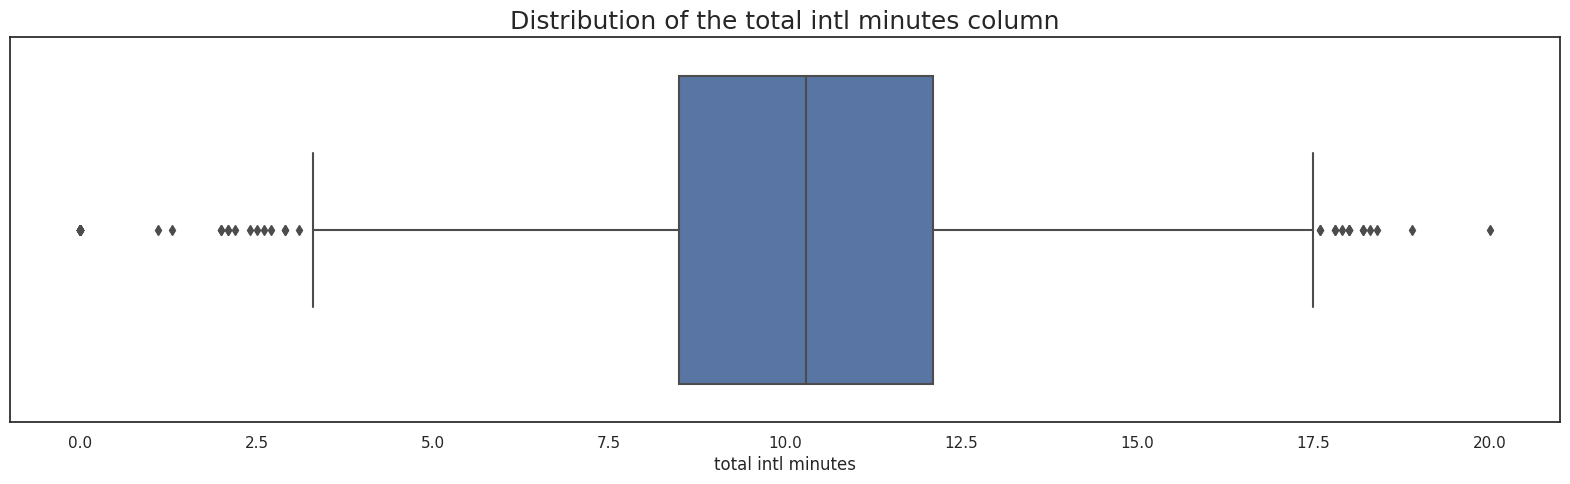

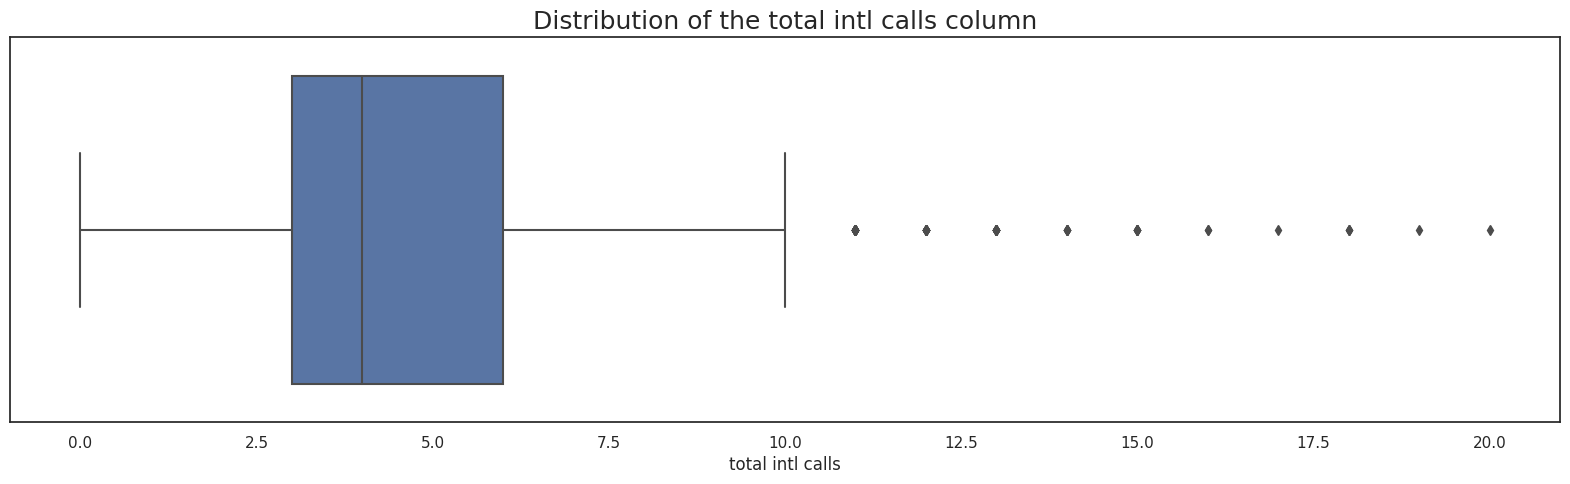

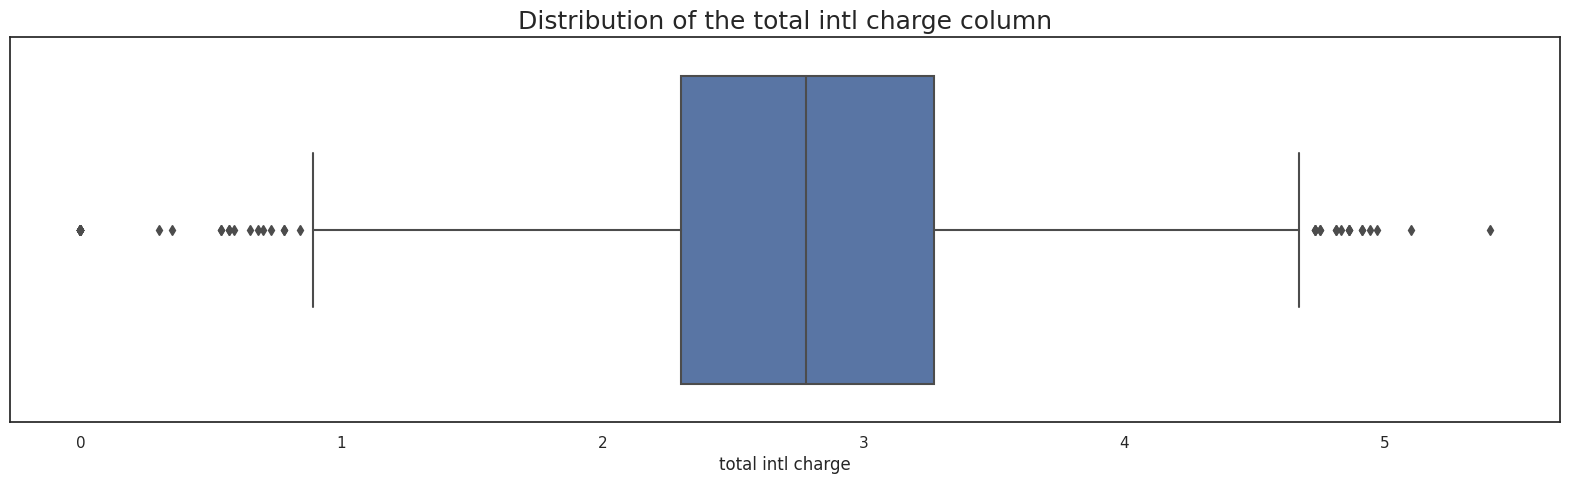

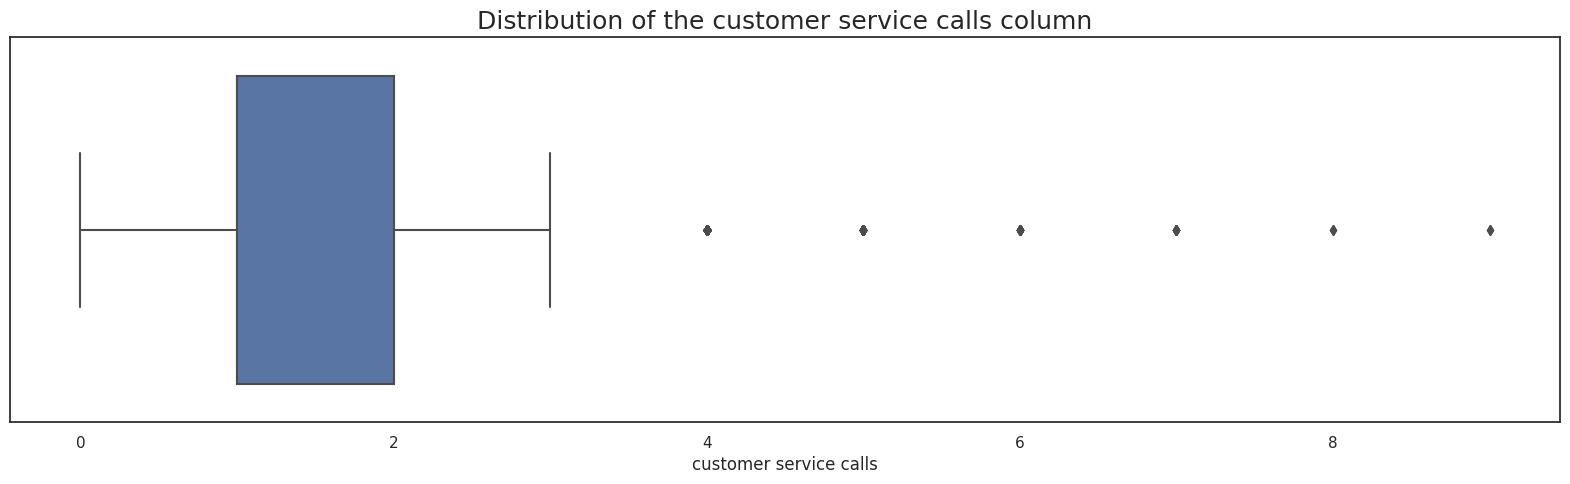

In [ ]:
# We will use subplots to plot individual boxplots
df1 = df[['number vmail messages','total day minutes','total day calls','total day charge',
'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge',
'total intl minutes','total intl calls','total intl charge','customer service calls']]

# Define subplot grid
for column in df1:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(18))
        sns.boxplot(data=df1, x=column)

Our dataset happens to have outliers from our boxplot visualization.

## *Data Preparation*

We will carry out our data preparation such as :
  * Data Type conversion.
  * Removing outliers.
  * Normalizing our dataset.
  * Dealing with multicolinearity.
  * Spliting the data.
  

#### *Data Type conversion*

In [ ]:
# Converting the stings in International plan and Voicemail plan into integers 
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [ ]:
# Converting phone number to integer and replacing the - 
df['phone number'] = df['phone number'].str.replace('-', '').astype(int)

In [ ]:
# Confirming the convertions
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

#### *Removing Outliers*

Column "account length" has 18 outlier(s):
state
TX    208
WY    215
SD    209
DE    224
UT    243
TX    217
VA    210
CT    212
NM    232
MI    225
WY    225
ID    224
SC    212
NC    210
DC    217
SC    209
SD    221
NY    209
Name: account length, dtype: int64
Outliers in column "account length" have been dropped.


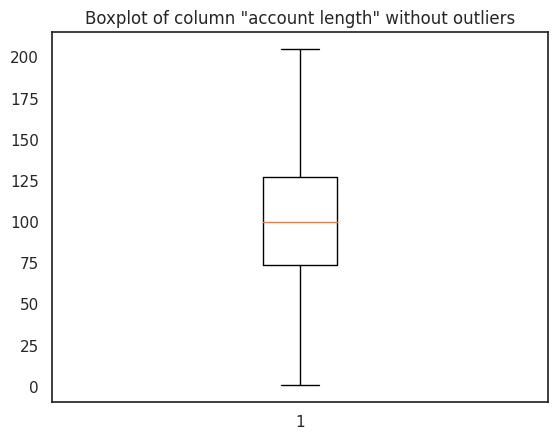

Column "area code" has no outliers.
Column "phone number" has no outliers.
Column "international plan" has 322 outlier(s):
state
OH    1
OK    1
AL    1
MO    1
WV    1
     ..
IL    1
VT    1
SD    1
GA    1
CT    1
Name: international plan, Length: 322, dtype: int64
Outliers in column "international plan" have been dropped.


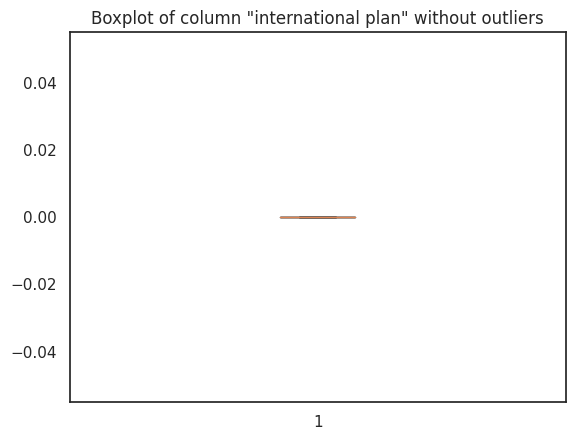

Column "voice mail plan" has no outliers.
Column "number vmail messages" has 1 outlier(s):
state
FL    51
Name: number vmail messages, dtype: int64
Outliers in column "number vmail messages" have been dropped.


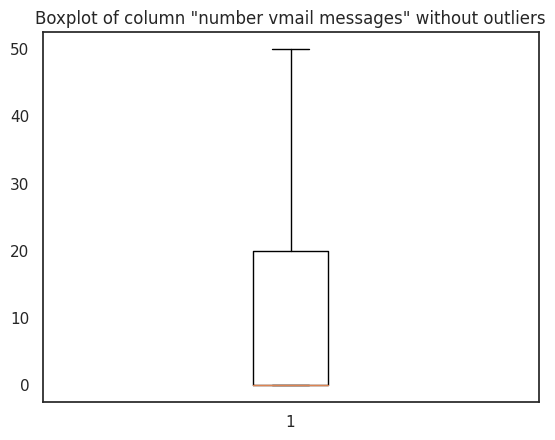

Column "total day minutes" has 27 outlier(s):
state
NY    332.9
OH    337.4
CO    350.8
MO    335.5
CO     30.9
NE     34.0
SC    322.5
DE    334.3
WY     25.9
ME    322.3
PA     35.1
SD      0.0
VT      0.0
SC     19.5
OK    329.8
WI      7.9
SD    328.1
KS     27.0
NH     17.6
WI    326.3
NH    322.4
OK      2.6
OH      7.8
OR    324.7
MI     18.9
NC    322.3
SC     29.9
Name: total day minutes, dtype: float64
Outliers in column "total day minutes" have been dropped.


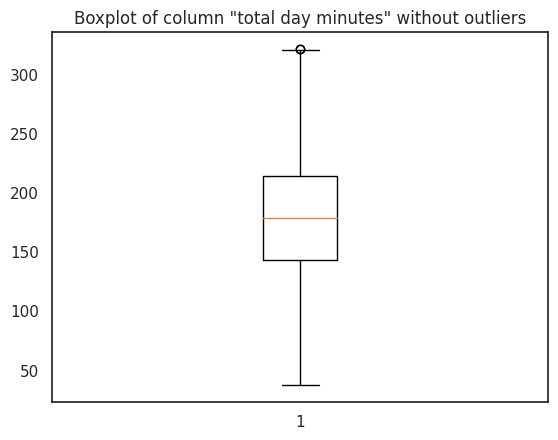

Column "total day calls" has 23 outlier(s):
state
VT     47
MA    158
DE     47
AZ    163
NE     36
UT     40
WV    158
MI    165
NH     30
MT     48
WY     45
MT    160
MS     48
MS    156
MT     35
CA     42
WY    158
IN    157
SC     45
UT     44
HI     44
OR     44
WV     40
Name: total day calls, dtype: int64
Outliers in column "total day calls" have been dropped.


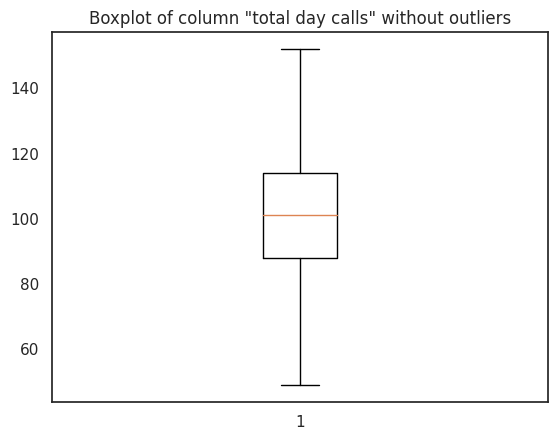

Column "total day charge" has 3 outlier(s):
state
CT    54.67
KS    54.62
MD    54.59
Name: total day charge, dtype: float64
Outliers in column "total day charge" have been dropped.


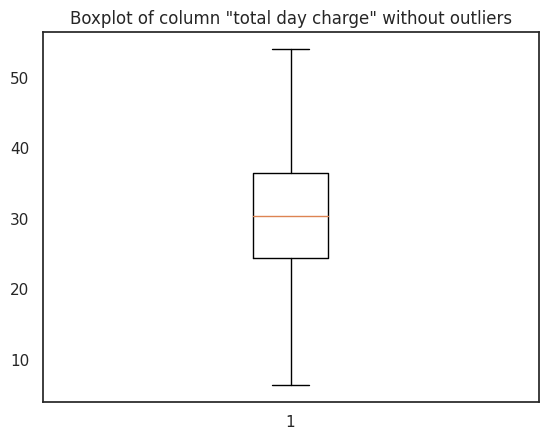

Column "total eve minutes" has 19 outlier(s):
state
MA    348.5
LA    351.6
LA     31.2
RI    350.5
OK     42.2
IN    347.3
NH     58.9
MN     43.9
WA     52.9
MN     42.5
AK     58.6
NE     56.0
IL     48.1
WY     60.0
TX     49.2
IN    361.8
MD    354.2
UT      0.0
CO    341.3
Name: total eve minutes, dtype: float64
Outliers in column "total eve minutes" have been dropped.


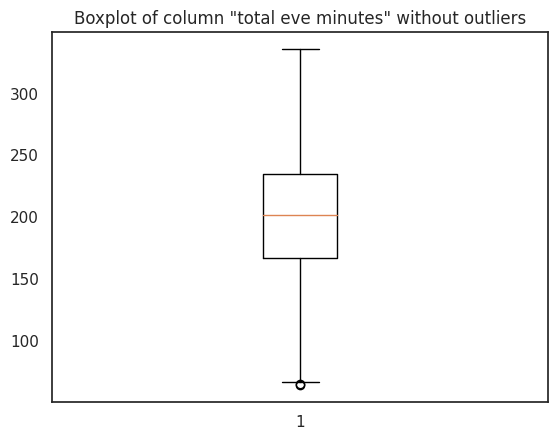

Column "total eve calls" has 18 outlier(s):
state
WI    164
OK     46
FL    168
AR     42
WV     37
AR     12
HI    157
PA    155
IA     45
CT     36
MD    156
NM     46
CO     44
SC    155
VA     46
MA     43
GA    155
NY    170
Name: total eve calls, dtype: int64
Outliers in column "total eve calls" have been dropped.


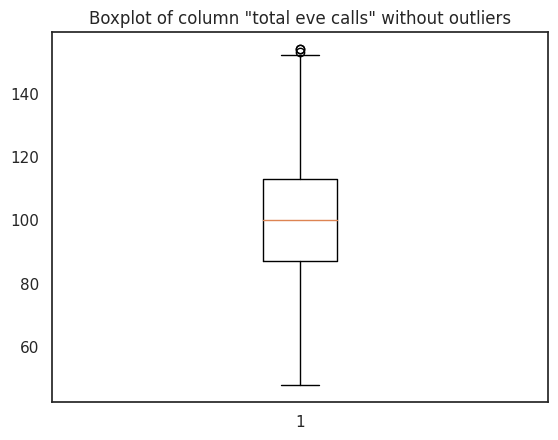

Column "total eve charge" has 2 outlier(s):
state
NY    5.47
DC    5.54
Name: total eve charge, dtype: float64
Outliers in column "total eve charge" have been dropped.


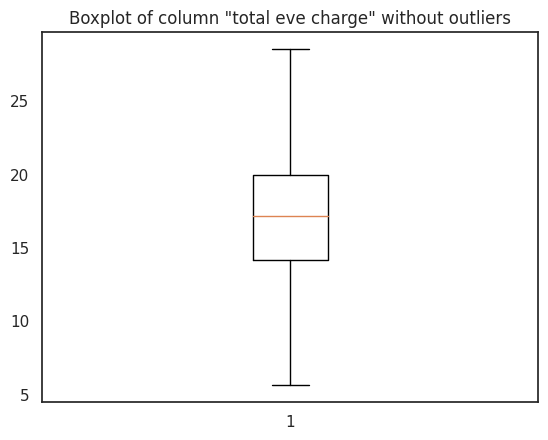

Column "total night minutes" has 29 outlier(s):
state
NJ     57.5
VA    354.9
CA    345.8
WY     45.0
PA    342.8
WI    364.3
MI     63.3
NC     54.5
MO     50.1
IA     43.7
MO    349.7
AK     23.2
CT     63.6
NE    381.9
ID    377.5
MO     65.7
AR    367.7
PA     56.6
VA     54.0
OH     64.2
UT    344.3
VA    395.0
IN    350.2
KS     50.1
OR     53.3
LA    352.2
GA    364.9
ND     61.4
OK     47.4
Name: total night minutes, dtype: float64
Outliers in column "total night minutes" have been dropped.


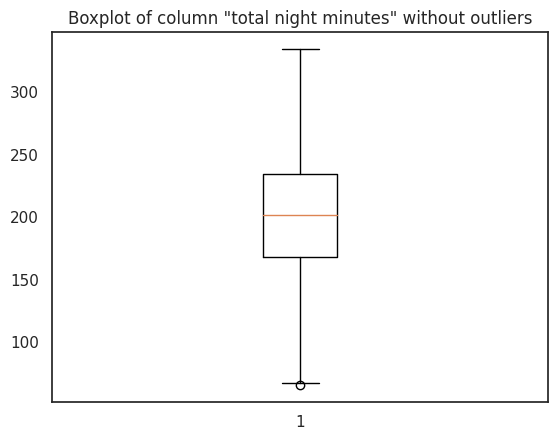

Column "total night calls" has 18 outlier(s):
state
AL     42
KY     44
TN     42
OR    153
RI    175
ID    155
VT    157
ME    157
MT    154
KY    153
NE    166
OK     33
MI    155
DE     38
VA     36
WY    156
ID    164
DE    153
Name: total night calls, dtype: int64
Outliers in column "total night calls" have been dropped.


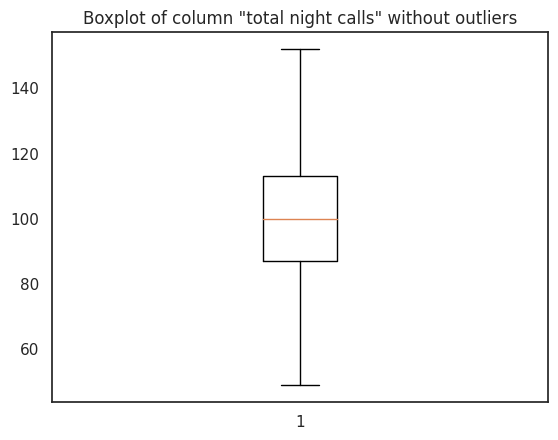

Column "total night charge" has 1 outlier(s):
state
GA    2.96
Name: total night charge, dtype: float64
Outliers in column "total night charge" have been dropped.


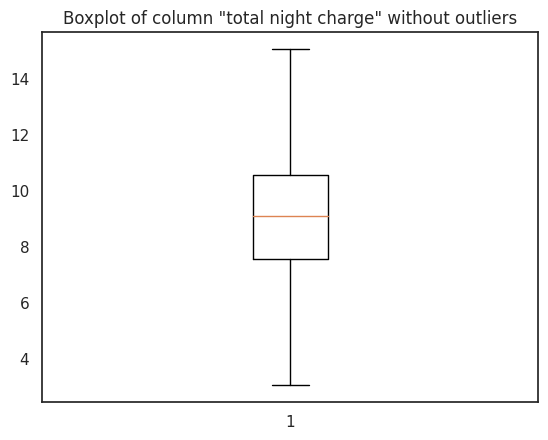

Column "total intl minutes" has 39 outlier(s):
state
KS     0.0
IN     2.7
ID    18.9
IN     0.0
MD    18.0
OR     2.0
VT     0.0
NE    18.2
HI     0.0
MO     0.0
WI     0.0
KS     0.0
OH     0.0
HI     2.2
UT    18.0
VA     0.0
VT     0.0
OR    18.4
NE     2.0
CA    17.8
AL     2.9
LA     3.1
OH    17.6
WY     2.6
FL     0.0
ND     0.0
IL    18.2
NY     0.0
CO    18.0
WV     1.1
NM     0.0
ID    18.3
CA     0.0
MA     0.0
LA     2.9
NH     2.1
NY     0.0
CA     0.0
OK    17.8
Name: total intl minutes, dtype: float64
Outliers in column "total intl minutes" have been dropped.


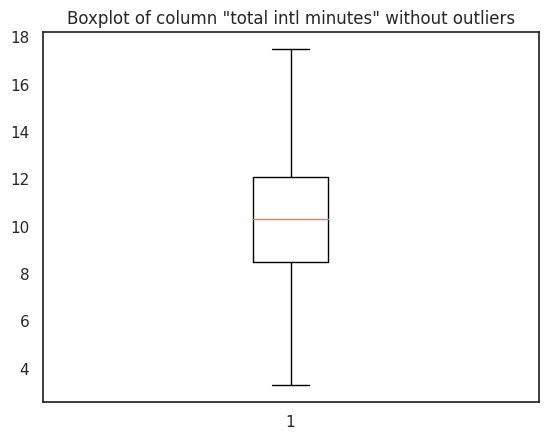

Column "total intl calls" has 68 outlier(s):
state
AZ    19
RI    11
NY    12
NM    13
AL    12
      ..
ME    11
AL    11
WA    13
MA    14
NY    17
Name: total intl calls, Length: 68, dtype: int64
Outliers in column "total intl calls" have been dropped.


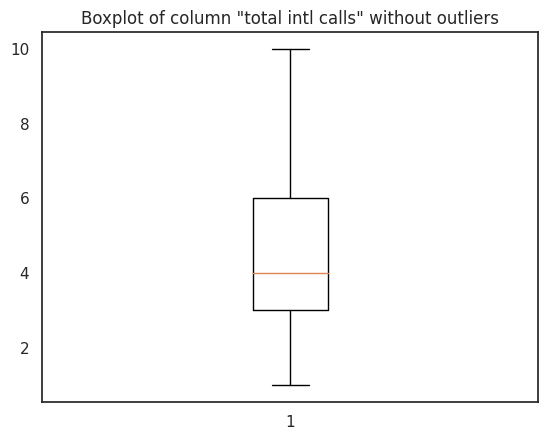

Column "total intl charge" has 2 outlier(s):
state
ID    4.73
MI    4.73
Name: total intl charge, dtype: float64
Outliers in column "total intl charge" have been dropped.


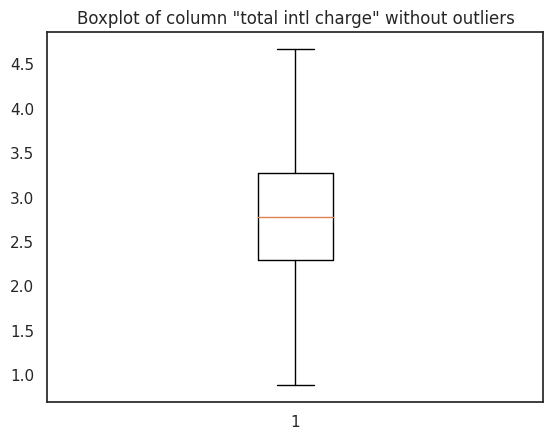

Column "customer service calls" has 221 outlier(s):
state
IN    4
IA    4
CO    5
ID    5
WY    5
     ..
ID    6
OR    5
AR    4
KS    4
IN    5
Name: customer service calls, Length: 221, dtype: int64
Outliers in column "customer service calls" have been dropped.


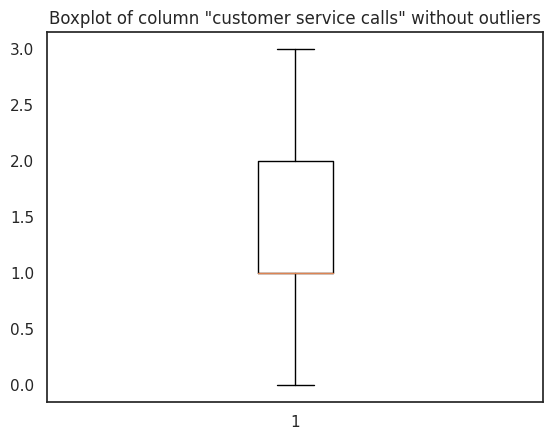

In [ ]:
# Define a function to identify outliers using IQR method
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Loop over each column in the Dataframe and detect outliers
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        outliers = detect_outliers_IQR(df[col])
        if outliers.any():
            print(f'Column "{col}" has {outliers.sum()} outlier(s):\n{df[col][outliers]}')
            # drop the outliers
            df = df[~outliers]
            print(f'Outliers in column "{col}" have been dropped.')
            # plot the boxplot of the column without outliers
            fig, ax = plt.subplots()
            ax.boxplot(df[col])
            ax.set_title(f'Boxplot of column "{col}" without outliers')
            plt.show()
        else:
            print(f'Column "{col}" has no outliers.')


#### *Dealing with multicolinearity*

In [ ]:
#Identifying the variables that are highly correlated
highly_correlated_variables_df = (
    df
    .corr()
    .abs()
    .stack()
    .reset_index()
    .sort_values(0, ascending=False)
)

highly_correlated_variables_df['variable_pairs'] = list(zip(highly_correlated_variables_df.level_0, highly_correlated_variables_df.level_1))
highly_correlated_variables_df = highly_correlated_variables_df.set_index('variable_pairs').drop(columns=['level_1', 'level_0'])
highly_correlated_variables_df.columns = ['correlation_coefficient']
highly_correlated_variables_df = highly_correlated_variables_df.drop_duplicates()

filter_condition = (highly_correlated_variables_df.correlation_coefficient > 0.75) & (highly_correlated_variables_df.correlation_coefficient < 1)
highly_correlated_variables_df[filter_condition]

,correlation_coefficient
variable_pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl charge, total intl minutes)",0.999992
"(number vmail messages, voice mail plan)",0.956744


Looking at this there is high colinearity among the following columns `'total day minutes', 'total day charge', 'total eve minutes','total eve charge', 'total night minutes', 'total night charge', 'total intl charge', 'total intl minutes'` .Multicolinearity can lead to unstable or biased estimates of the model coefficients, and reduce the model's ability to generalize to new data.

In [ ]:
#Removing the  in order to reduce collinear features.
df.drop(columns=['total day charge','total eve charge','total night charge','total intl charge'], inplace=True)

In [ ]:
#Verifying the drop of columns 
#Get the column names
column_names = df.columns.tolist()

#Print the column names
print(column_names)

['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls', 'churn']


#### *Normalization*

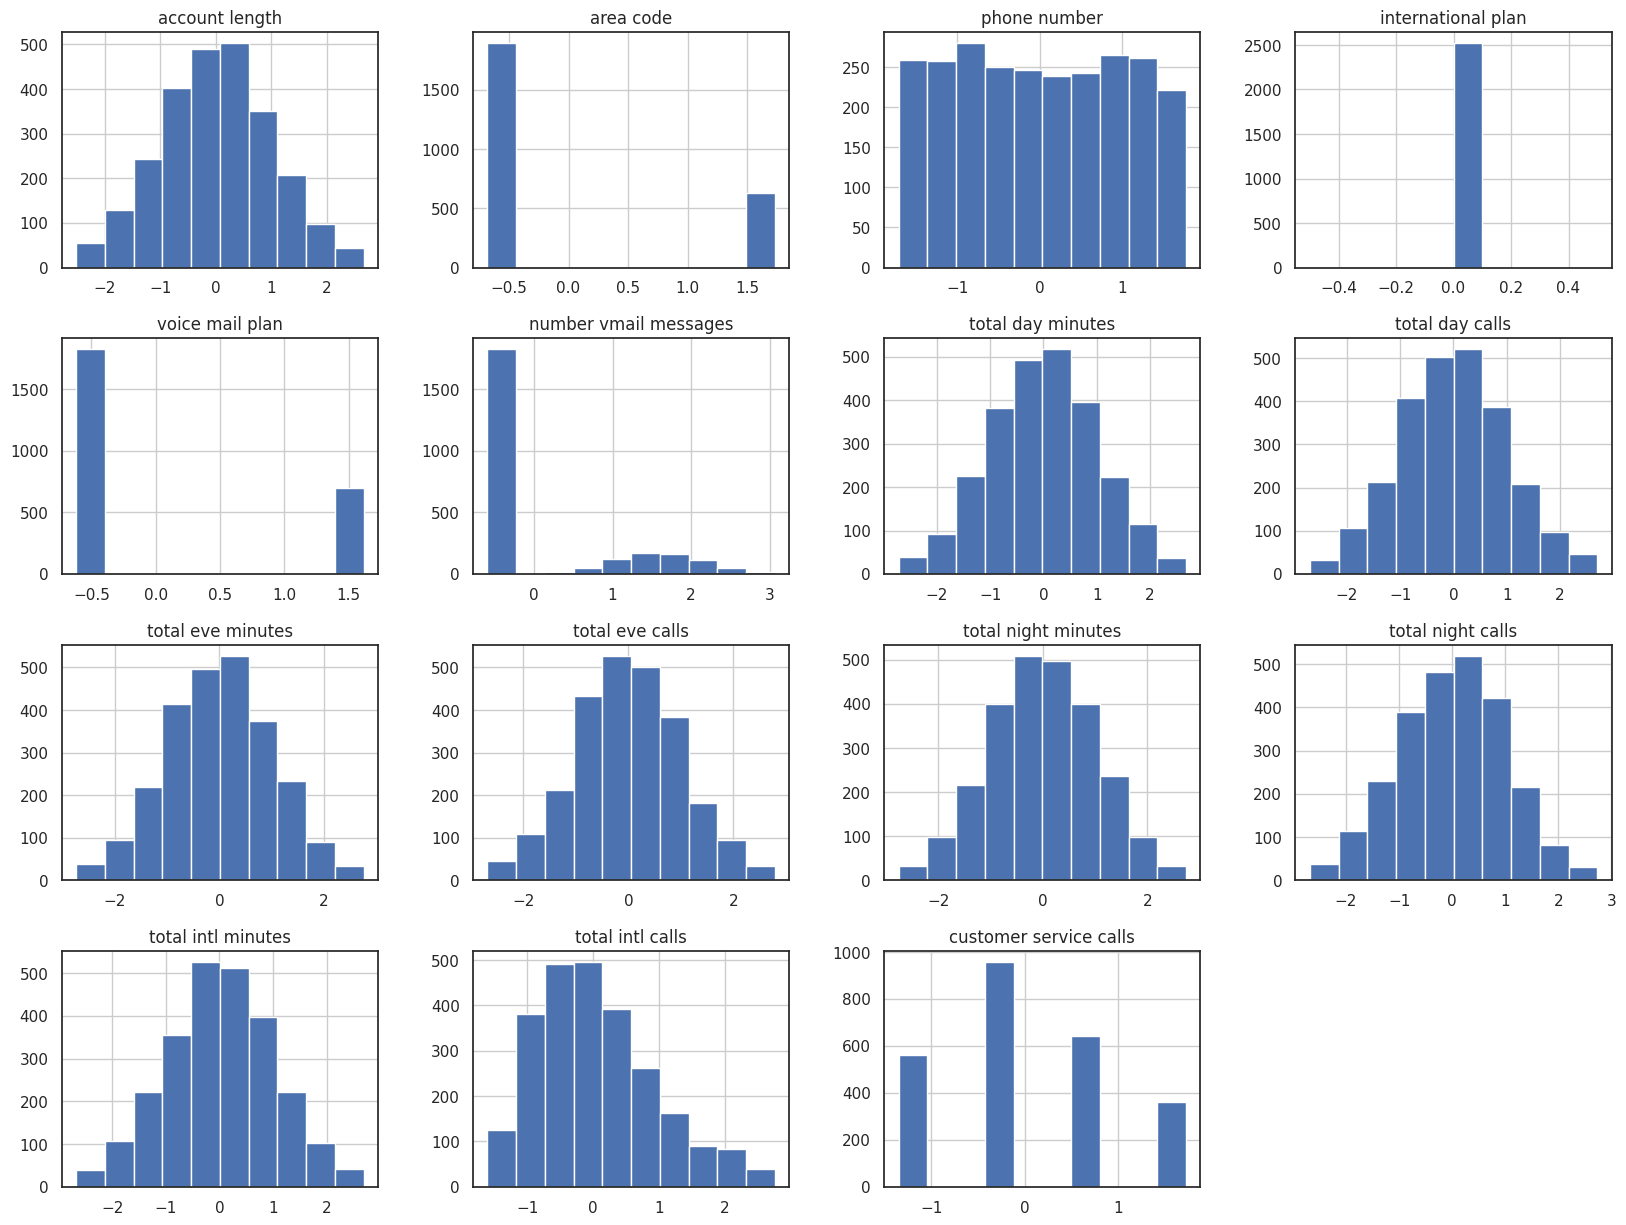

In [ ]:
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

#Create an instance of the StandardScaler
scaler = StandardScaler()

#Fit and transform the data
numeric_cols_normalized = scaler.fit_transform(numeric_cols)

#Create a DataFrame from the normalized data
numeric_cols_normalized_df = pd.DataFrame(numeric_cols_normalized, columns=numeric_cols.columns)

#Plot histograms of the normalized data
numeric_cols_normalized_df.hist(figsize=(20,15));


#### *Splitting the data*

In [ ]:
# Split the data into X (independent variables) and y (dependent variable)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])
X = df.drop(['churn'], axis=1)
y = df['churn']

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1765 757 1765 757


In [ ]:
X_train

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
state,,,,,,,,,,,,,,,
KS,46,510,3655979,0,0,0,250.3,100,260.6,90,195.0,104,13.3,2,2
TN,95,510,3657784,0,0,0,174.0,57,281.1,118,197.2,94,9.7,2,0
WI,111,415,3509313,0,1,36,166.2,54,238.8,109,108.8,92,11.2,2,3
VA,99,415,4006257,0,1,42,216.0,125,232.3,104,215.5,100,9.3,4,2
KS,131,415,4015012,0,1,28,249.6,87,227.2,138,239.9,92,7.6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,136,415,3847216,0,1,35,205.5,86,298.5,119,214.2,104,6.9,4,1
RI,112,415,4057467,0,0,0,168.6,102,298.0,117,194.7,110,9.8,5,1
WA,104,415,3902320,0,0,0,139.7,78,202.6,119,203.6,102,11.3,5,2


## *Modelling*

The target variable for this project is the binary variable 'Churn', indicating whether a customer has churned or not. Since the target variable is binary, a classification model is appropriate for this project. Some appropriate classification models that could be used for this project include logistic regression, decision tree, random forest, support vector machines (SVM), and neural networks. The specific model(s) chosen will depend on the size and complexity of the dataset, as well as the performance metrics and interpretability requirements of the stakeholders.

* Select modeling technique: Choose the appropriate modeling technique based on the business problem and data characteristics.     In the case of customer churn, you might use a logistic regression model or a decision tree model.

* Build model: Build the model using the selected technique and the prepared data. This might involve feature selection,           parameter tuning, and model evaluation.

* Assess model: Evaluate the performance of the model using various metrics such as accuracy, precision, recall, and F1-score.     This will help you determine whether the model is suitable for deployment.

#### *Decision Tree Model*


It is not necessary to one-hot encode boolean columns (binary variables) like the "churn" column in your dataset. Decision trees can handle binary variables directly without the need for one-hot encoding.

In fact, one-hot encoding a binary column may introduce unnecessary complexity and redundancy in the decision tree.

#### *Building the model*

In [ ]:
# Create an instance of the decision tree classifier and fit the model on the training data
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

#### *Evaluating the model Before Tuning*

Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9286657859973579
Precision: 0.6037735849056604
Recall: 0.49230769230769234
F1-score: 0.5423728813559323


#### *Tuning the model*

Determine the optimal hyperparameters for the decision tree model using techniques such as grid search.

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Use the best model found for predictions
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

#### *Evaluating the model After tuning*

Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predd)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_predd)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_predd)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_predd)
print("F1-score:", f1)

Accuracy: 0.9418758256274768
Precision: 0.7837837837837838
Recall: 0.4461538461538462
F1-score: 0.5686274509803922


The performance metrics before and after tuning the model show changes in the accuracy, precision, recall, and F1-score. Here's an explanation of each metric and the differences observed:

1. Accuracy: Accuracy measures the overall correctness of the model's predictions. It calculates the ratio of correctly predicted instances to the total number of instances. 

   - Before tuning: Accuracy was 0.9287, indicating that the model correctly predicted 92.87% of the instances.
   - After tuning: Accuracy improved to 0.9419, indicating that the tuned model achieved a higher accuracy of 94.19%.

   The increase in accuracy after tuning suggests that the model's overall prediction performance improved.

2. Precision: Precision is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of correctly predicted positive instances out of all instances predicted as positive.

   - Before tuning: Precision was 0.6038, indicating that the model correctly predicted 60.38% of the positive instances.
   - After tuning: Precision improved to 0.7838, indicating that the tuned model achieved a higher precision of 78.38%.

   The increase in precision after tuning suggests that the tuned model reduced the rate of false positives, resulting in more accurate positive predictions.

3. Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances.

   - Before tuning: Recall was 0.4923, indicating that the model correctly predicted 49.23% of the actual positive instances.
   - After tuning: Recall decreased to 0.4462, indicating that the tuned model achieved a lower recall of 44.62%.

   The decrease in recall after tuning suggests that the tuned model may have missed some positive instances compared to the original model.

4. F1-score: F1-score is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall into a balanced measure of performance.

   - Before tuning: F1-score was 0.5424.
   - After tuning: F1-score improved to 0.5686.

   The increase in F1-score after tuning indicates an overall improvement in the model's performance in terms of balancing precision and recall.

In summary, the performance metrics show that after tuning the model, there was an improvement in accuracy and precision. However, there was a slight decrease in recall, indicating that the tuned model may have sacrificed some recall to achieve higher precision. The overall F1-score increased, suggesting a better balance between precision and recall.


In this instance there is a trade off between the precison and recall rate the objective of the project is to correctly predict a customer likely to churn hence Precision(True predicted positives) in this case is a priority than having a high true positive rate.

#### *Visualizing the model*

Visualize the decision tree model to gain insights into how the model is making predictions and the variables that are most important for predicting the target variable.

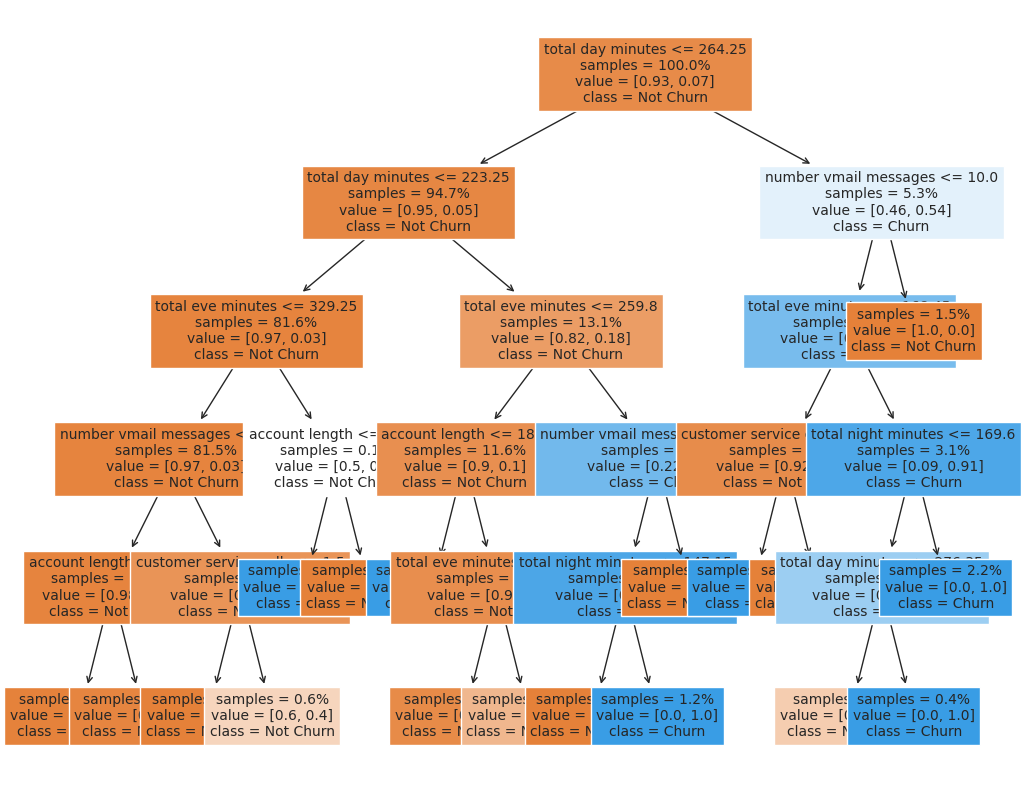

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], fontsize=10, impurity=False, precision=2, proportion=True)
plt.show()

#### Logistic Regression model



In [192]:
X = df.drop(['churn'], axis=1)
y = df['churn']
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [193]:
# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [194]:
## Scaling our data
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

ValueError: ignored

In [ ]:
##Building the model
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' 
#solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

In [ ]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [ ]:
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [ ]:
## Evaluating Model Performance
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train ^ y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

Train Set Results¶ 1759 False (132) True  93% Accuracy

How many times was the classifier correct on the test set?

In [ ]:
# Repeat previous step with test data
# Find residual differences between test data and predicted test data
residuals = np.abs(y_test ^ y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

Test Set Results: 578 False (53) True  91.6% Accuracy

Confusion Matrix

In [ ]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

In [ ]:
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
    print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
    print('\n')
    print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
    print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
    print('\n')
    print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
    print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
    print('\n')    
    print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
    print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))
    print('\n')

Our performance metrics before tuning

In [ ]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.0
Testing Precision:  0.0


Training Recall:  0.0
Testing Recall:  0.0


Training Accuracy:  0.93
Testing Accuracy:  0.91


Training F1-Score:  0.0
Testing F1-Score:  0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tuning our model


In [ ]:
# Create range of candidate penalty hyperparameter values
penalty = ['l2']

# Create range of candidate regularization hyperparameter values
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5)

# Fit grid search to training data
best_model = clf.fit(X_train, y_train)

# Use best hyperparameters to fit logistic regression model
logreg_tuned = LogisticRegression(penalty=best_model.best_estimator_.get_params()['penalty'], C=best_model.best_estimator_.get_params()['C'], fit_intercept=False)
logreg_tuned.fit(X_train, y_train)

# Generate model prediction data for train and test sets using tuned model
y_hat_train_tuned = logreg_tuned.predict(X_train)
y_hat_test_tuned = logreg_tuned.predict(X_test)

# Compute confusion matrix for test set using tuned model
cnf_matrix_tuned = confusion_matrix(y_test, y_hat_test_tuned)
cnf_matrix_tuned

array([[575,   0],
       [ 56,   0]])

We then check our metrics to see the changes after tuning our model.

In [ ]:
print_metrics(y_train, y_hat_train_tuned, y_test, y_hat_test_tuned)

Training Precision:  0.0
Testing Precision:  0.0


Training Recall:  0.0
Testing Recall:  0.0


Training Accuracy:  0.93
Testing Accuracy:  0.91


Training F1-Score:  0.0
Testing F1-Score:  0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


from our confusion metrics summary on our logistic model we can tell that
   * precison (number of relevant items selected) imporoved on our training data from 0.64 to 0.71 while on the testing data it dropped from 0.6 to 0.5
   * Recall(number of selected items that are relevant) dropped on both our training and test data from 0.1 to 0.04 and from 0.16 to 0.04.
   * Accuracy which tells us the total number of predictions a model gets right was maintained at 0.93 on our training data and dropped slightly with our testing data with a difference of 0.01.
   * F1 dropped halfway on our training data and our testing data from 0.18 to 0.07 and from 0.25 to 0.07 respectively. 

In [ ]:
def print_metric_comparisons(X, y):
    
    # Create an empty list for each of the 4 classification metrics (Precision/Recall/Accuracy/F1-Score)
    training_precision = []
    testing_precision = []
    training_recall = []
    testing_recall = []
    training_accuracy = []
    testing_accuracy = []
    training_f1 = []
    testing_f1 = []
    
    # Iterate through a range of test_sizes to use for our logistic regression, using same parameters as our first logistic regression in our notebook. Append each respective result metric to its respective list.
    for i in range(10, 95):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0, random_state = 33)
        logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
        model_log = logreg.fit(X_train, y_train)
        y_hat_test = logreg.predict(X_test)
        y_hat_train = logreg.predict(X_train)

        training_precision.append(precision_score(y_train, y_hat_train))
        testing_precision.append(precision_score(y_test, y_hat_test))
        training_recall.append(recall_score(y_train, y_hat_train))
        testing_recall.append(recall_score(y_test, y_hat_test))
        training_accuracy.append(accuracy_score(y_train, y_hat_train))
        testing_accuracy.append(accuracy_score(y_test, y_hat_test))
        training_f1.append(f1_score(y_train, y_hat_train))
        testing_f1.append(f1_score(y_test, y_hat_test))
        
    # Use subplots to create a scatter plot of each of the 4 metrics. 
    plt.figure(figsize = (20, 10))
    plt.subplot(221)
    plt.title('Precision Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training precision list
    plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
    # Scatte4r plot test precision list
    plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(222)
    plt.title('Recall Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training recall list
    plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
    # Scatter plot test recall list
    plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(223)
    plt.title('Accuracy Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training accuracy list
    plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
    # Scatter plot test accuracy list
    plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(224)
    plt.title('F1 Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training f1-score list
    plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
    # Scatter plot testing f1-score list
    plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.tight_layout()

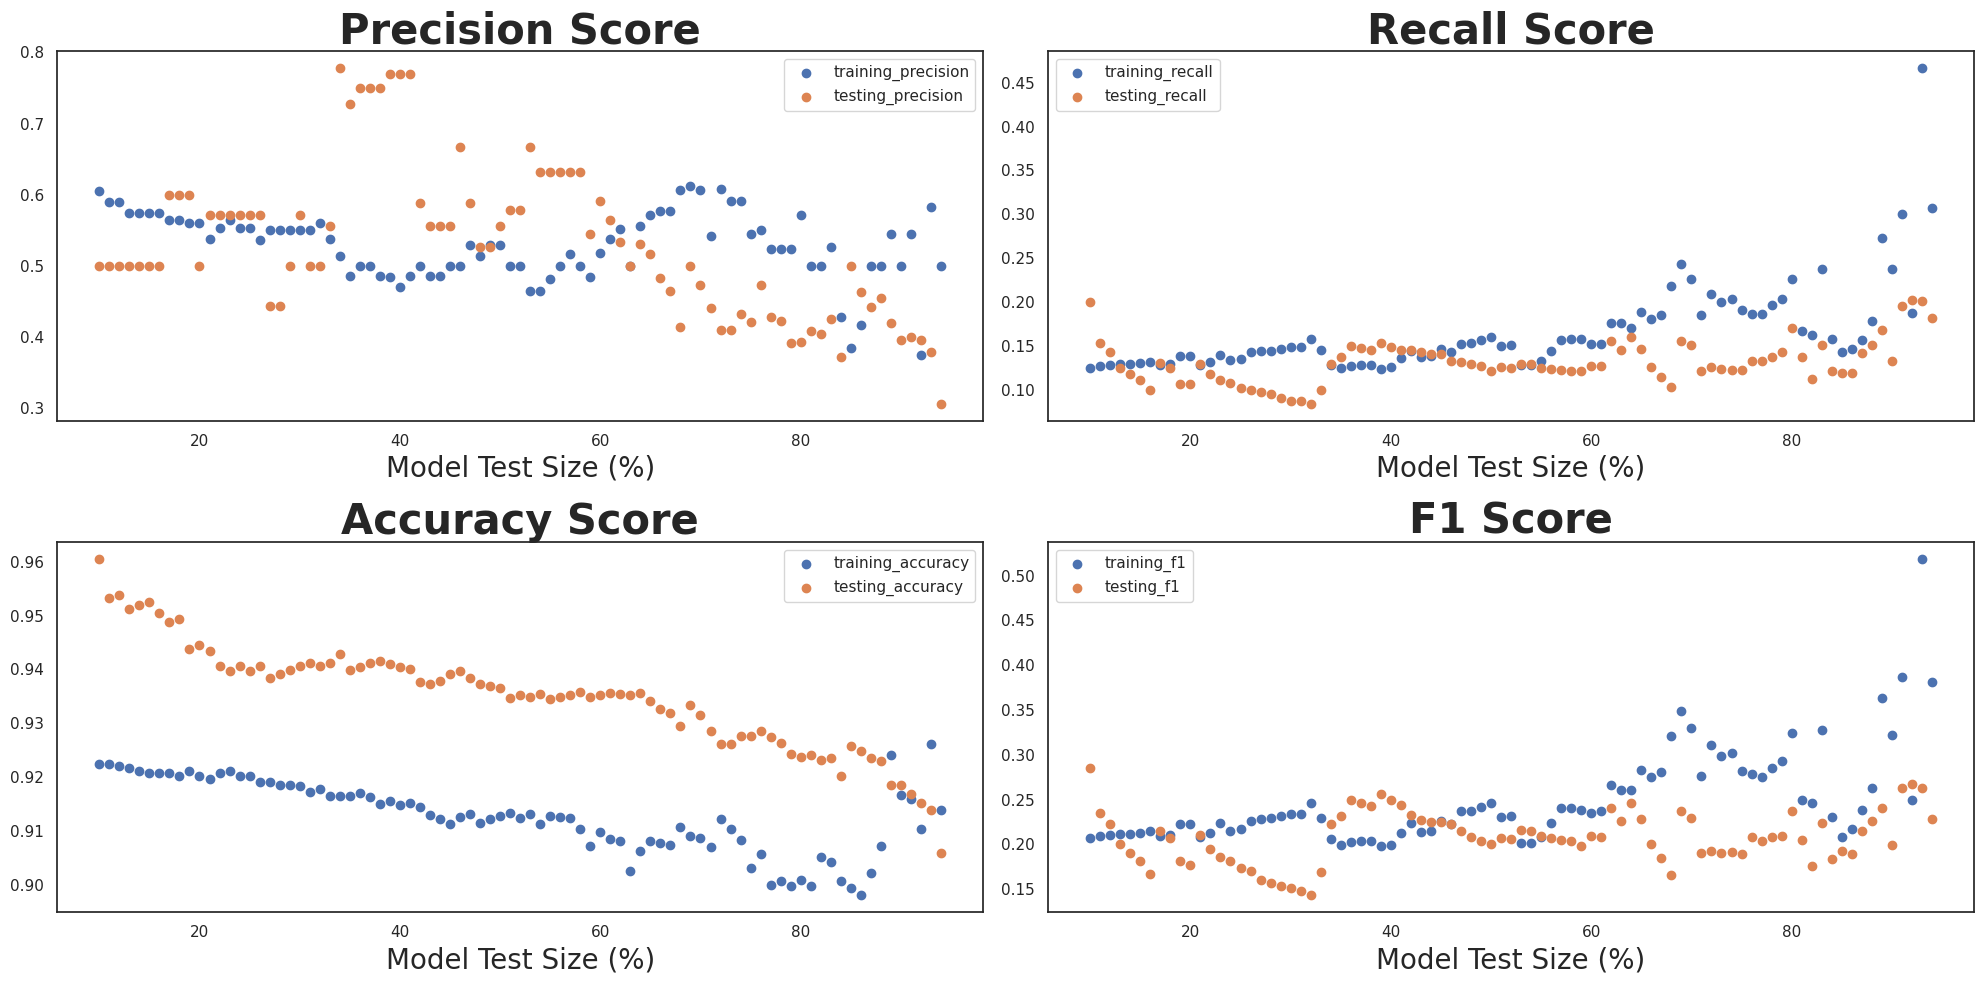

In [ ]:
# Print residual scatter plot for 4 main logistic model metrics, iterating through the model and passing multiple 
# test-size objects to visualize effects of train/test size on model performance
print_metric_comparisons(X, y)

In [ ]:
def plot_auc(model, X_train, X_test, y_train, y_test):
    
    # Calculate probability score of each point in training set
    y_train_score = model.decision_function(X_train)
    # Calculate false positive rate, true positive rate, and thresholds for training set
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate probability score of each point in test set
    y_test_score = model.decision_function(X_test)
    # Calculate false positive rate, true positive rate, and thresholds for test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    # Print Area-Under-Curve scores
    print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    
    plt.figure(figsize = (20, 8))
    lw = 2
    
    # Use Train False/True Positive ratios to plot receiver operating characteristic curve for training set
    plt.subplot(121)
    plt.plot(train_fpr, train_tpr, color = 'red', lw = lw, label = 'ROC Curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.title('Receiver operating characteristic (ROC) Curve for Training Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')

    # Use Test False/True positive ratios to plot receiver operating characteristic curve for test set
    plt.subplot(122)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.title('Receiver operating characteristic (ROC) Curve for Test Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')
    
    plt.tight_layout()

Training AUC: 0.5141744586919319
Test AUC: 0.456583850931677


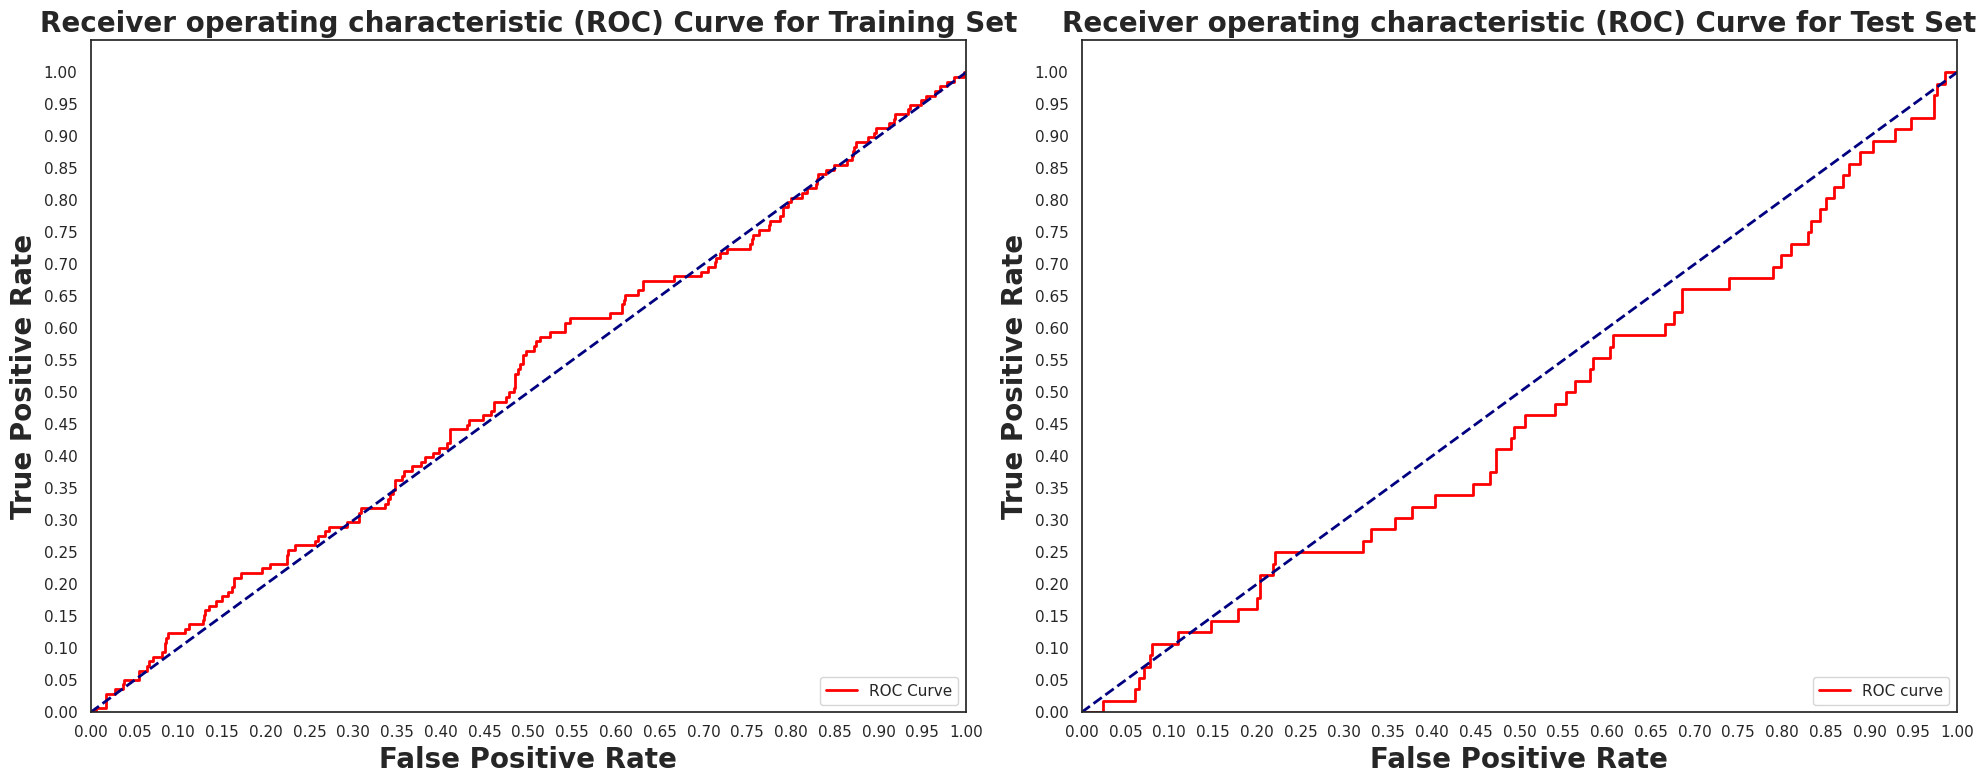

In [ ]:
plot_auc(logreg, X_train, X_test, y_train, y_test)

From this we can conclude that the Area Under Curve is above the 0.05 score making it a good AUC score
This is both the case on our training data and testing data.

# Gaussian Naive Bayes

This model is used when working with continuous data.
An assumption made is that our variables are continuous which are also distributed according to a normal (or Gaussian) distribution.

Since we normalized our variables, we shall model using Gaussian Naive Bayes

## Building the model

In [ ]:
# Define the model
GNB = GaussianNB()

# Train model
GNB.fit(X_train, y_train)

# We predict target values
Y_predict = GNB.predict(X_test)

## Evaluating the model before tuning

In [ ]:
# Print the Classification report of test set
print(classification_report(y_test, Y_predict))
# Calculate accuracy
accuracy = accuracy_score(y_test, Y_predict)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, Y_predict)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, Y_predict)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, Y_predict)
print("F1-score:", f1)

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       575
        True       0.87      0.23      0.37        56

    accuracy                           0.93       631
   macro avg       0.90      0.61      0.66       631
weighted avg       0.92      0.93      0.91       631

Accuracy: 0.9286846275752774
Precision: 0.8666666666666667
Recall: 0.23214285714285715
F1-score: 0.3661971830985915


Tuning the model

Determine the optimal hyperparameters for the naive bayes model using StandardScaler


In [ ]:
# Build a pipeline with StandardScaler and GaussianNB
from sklearn.pipeline import Pipeline
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('GB', GaussianNB())])
scaled_pipeline_2

Pipeline(steps=[('ss', StandardScaler()), ('GB', GaussianNB())])

In [ ]:
# Fit the training data to pipeline
scaled_pipeline_2.fit(X_train, y_train)
# predict using our tuned model
y_predict2 = scaled_pipeline_2.predict(X_test)

## Evaluating the model

Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score





In [ ]:
# Print the Classification report of test set
print(classification_report(y_test, y_predict2))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict2)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_predict2)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_predict2)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_predict2)
print("F1-score:", f1)

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       575
        True       1.00      0.36      0.53        56

    accuracy                           0.94       631
   macro avg       0.97      0.68      0.75       631
weighted avg       0.95      0.94      0.93       631

Accuracy: 0.9429477020602218
Precision: 1.0
Recall: 0.35714285714285715
F1-score: 0.5263157894736842


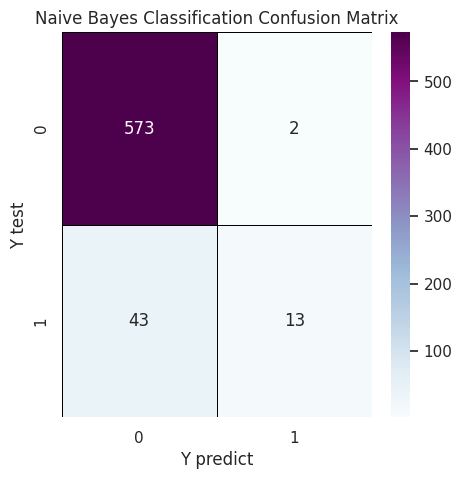

In [ ]:
# plot a confusion matrix to view a summary of prediction results
nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y test')
plt.ylabel('Y predict')
plt.show()

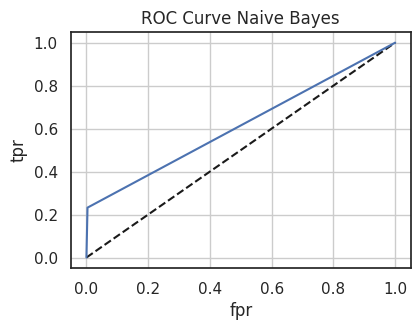

In [ ]:
# plot the Receiver Operating Characteristic curve which shows the performance of our model
fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
plt.subplot(322)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()



From the above curve, the ROC is approaching 1 which is good. It means that our model is working well.



### Observations
We see thats there is an increase in all of our performace metrics after tuning indicating that our model is working well.

The accuracy of 0.941 indicates that our model is very good in prediction and results can be relied upon.

Bagging using Random Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

1) Bagged Trees

In [ ]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [ ]:
bagged_tree.score(X_train, y_train)

0.9719725013220518

In [ ]:
bagged_tree.score(X_test, y_test)

0.9540412044374009

2) Bagged Trees with GrindSearchCV

In [ ]:
dt = DecisionTreeClassifier(
                            criterion = 'entropy',
                            max_depth = 6,
                            min_samples_leaf = 1,
                            min_samples_split = 30,
                            random_state = 33)

bc_param_grid = {
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'n_estimators':[1,5,10,15,20,25],
    'max_samples':[0.2,0.4,0.6,0.8,1.0]
}

grid_search = GridSearchCV(BaggingClassifier(dt), param_grid = bc_param_grid, cv = 4, verbose = True)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                          max_depth=6,
                                                                          min_samples_split=30,
                                                                          random_state=33)),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [1, 5, 10, 15, 20, 25]},
             verbose=True)

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_samples': 0.8, 'n_estimators': 15}
Best Score: 0.9624489375425521


In [ ]:
test_preds = grid_search.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [ ]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.8611111111111112
Recall Score: 0.5535714285714286
Accuracy Score: 0.9524564183835182
F1 Score: 0.6739130434782609


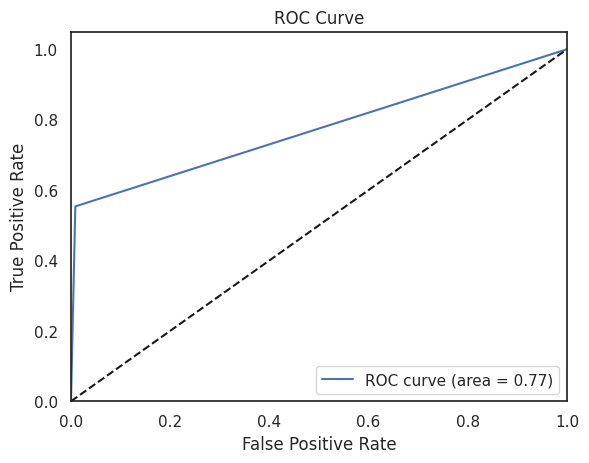

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,False,True,All
True,,,
False,570,5,575
True,25,31,56
All,595,36,631


In [ ]:
report1 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report1

,precision,recall,f1-score,support
False,0.957983,0.991304,0.974359,575.000000
True,0.861111,0.553571,0.673913,56.000000
accuracy,0.952456,0.952456,0.952456,0.952456
macro avg,0.909547,0.772438,0.824136,631.000000
weighted avg,0.949386,0.952456,0.947695,631.000000


3) Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 33)
rf.fit(X_train, y_train)
test_preds = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [ ]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.9583333333333334
Recall Score: 0.4107142857142857
Accuracy Score: 0.9461172741679873
F1 Score: 0.575


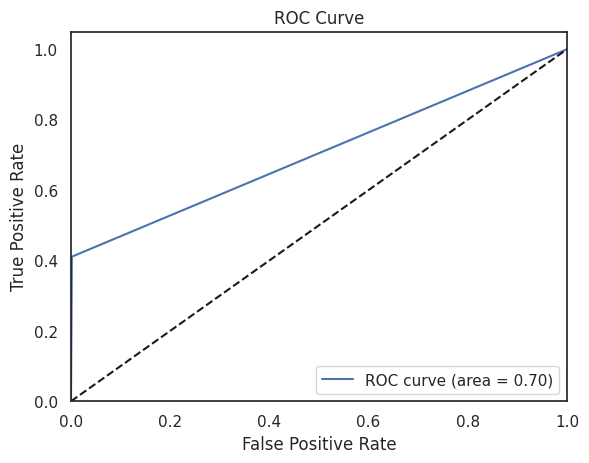

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,False,True,All
True,,,
False,574,1,575
True,33,23,56
All,607,24,631


In [ ]:
report2 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report2

,precision,recall,f1-score,support
False,0.945634,0.998261,0.971235,575.000000
True,0.958333,0.410714,0.575000,56.000000
accuracy,0.946117,0.946117,0.946117,0.946117
macro avg,0.951984,0.704488,0.773118,631.000000
weighted avg,0.946761,0.946117,0.936070,631.000000


4) Random Forest GrindSearch CV

In [ ]:
param_grid = {
            'n_estimators': [20,22,25],
            'max_features': ['auto'],
            'max_depth': [8,10,12],
            'min_samples_split' : [20,25,30],
            'min_samples_leaf' : [1, 2, 3],
            'bootstrap':[True]
}

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 4, verbose = True)
gs_rf.fit(X_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [20, 22, 25]},
             verbose=True)

In [ ]:
test_preds = gs_rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [ ]:
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 22}

In [ ]:
gs_rf.best_score_

0.9508176711936074

In [ ]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 1.0
Recall Score: 0.3392857142857143
Accuracy Score: 0.9413629160063391
F1 Score: 0.5066666666666666


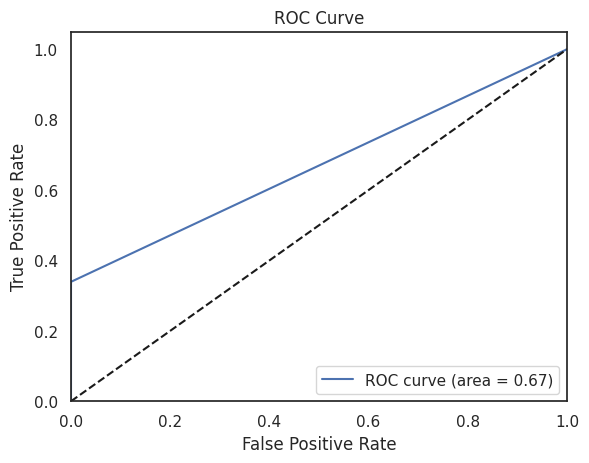

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Observations
From our Random Forest we can see that precision increased from 0.95 to 1.0  but the model was able to maintain it's Accuracy at 0.94

The models Recall dropped from 0.41 to 0.35 while the F1 Score also dropped from 0.57 to 0.52

In [ ]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,False,True,All
True,,,
False,575,0,575
True,37,19,56
All,612,19,631


In [ ]:
report3 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report3

,precision,recall,f1-score,support
False,0.939542,1.000000,0.968829,575.000000
True,1.000000,0.339286,0.506667,56.000000
accuracy,0.941363,0.941363,0.941363,0.941363
macro avg,0.969771,0.669643,0.737748,631.000000
weighted avg,0.944908,0.941363,0.927813,631.000000


In [ ]:
report1,  report2,  report3

(              precision    recall  f1-score     support
 False          0.957983  0.991304  0.974359  575.000000
 True           0.861111  0.553571  0.673913   56.000000
 accuracy       0.952456  0.952456  0.952456    0.952456
 macro avg      0.909547  0.772438  0.824136  631.000000
 weighted avg   0.949386  0.952456  0.947695  631.000000,
               precision    recall  f1-score     support
 False          0.945634  0.998261  0.971235  575.000000
 True           0.958333  0.410714  0.575000   56.000000
 accuracy       0.946117  0.946117  0.946117    0.946117
 macro avg      0.951984  0.704488  0.773118  631.000000
 weighted avg   0.946761  0.946117  0.936070  631.000000,
               precision    recall  f1-score     support
 False          0.939542  1.000000  0.968829  575.000000
 True           1.000000  0.339286  0.506667   56.000000
 accuracy       0.941363  0.941363  0.941363    0.941363
 macro avg      0.969771  0.669643  0.737748  631.000000
 weighted avg   0.944908  0.9

### *Conclusion*

Factors that might contribute to churning of customers include :

* The account length w of 90 days and above has more likelyhood of churning

* The area code 415 records

* An increase of charges leads to customers churning

* The customer service calls happen to result from

### *Recommendations*

What can the company do to retain customers and what retention strategies can be adopted:
* Customers who use SyriaTel should be highly encouraged to get onto the international plan.

* A value add on should be given to customers when they start approaching 90days and above of being members.

* Customer-centric Approach: provide personalized and tailored services that enhance the customer experience.

* Quality Assurance: maintain high-quality customer service across all touchpoints. 

* By conducting a thorough analysis, evaluating costs, considering customer value, assessing revenue impacts and exploring value-added services the company can strategically lower call charges while main